# Generate Data for Chartbook

Brian Dew

@bd_econ

In [2]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

In [89]:
nipa_series_codes(retrieve_table('T10105'))

{'A191RC': 'Gross domestic product',
 'B009RC': 'Structures',
 'Y033RC': 'Equipment',
 'Y001RC': 'Intellectual property products',
 'A011RC': 'Residential',
 'A014RC': 'Change in private inventories',
 'A019RC': 'Net exports of goods and services',
 'B020RC': 'Exports',
 'A253RC': 'Goods',
 'A646RC': 'Services',
 'B021RC': 'Imports',
 'DPCERC': 'Personal consumption expenditures',
 'A255RC': 'Goods',
 'B656RC': 'Services',
 'A822RC': 'Government consumption expenditures and gross investment',
 'A823RC': 'Federal',
 'A824RC': 'National defense',
 'A825RC': 'Nondefense',
 'A829RC': 'State and local',
 'DGDSRC': 'Goods',
 'DDURRC': 'Durable goods',
 'DNDGRC': 'Nondurable goods',
 'DSERRC': 'Services',
 'A006RC': 'Gross private domestic investment',
 'A007RC': 'Fixed investment',
 'A008RC': 'Nonresidential'}

### GDP components

In [2]:
pop = nipa_df(retrieve_table('T20100')['Data'], ['B230RC'])['B230RC']

srs = {'A191RX': '\hspace{0.5mm} {\color{red!95!black}\\textbf{---}} Gross Domestic Product', 
       'DPCERX': '\hspace{2.5mm} {\color{yellow!65!orange}\\textbf{---}} Consumer Spending', 
       'A006RX': '\hspace{2.5mm} {\color{blue!70!black}\\textbf{---}} Gross Private Domestic Investment', 
       'A822RX': '\hspace{2.5mm} {\color{cyan!60!white}\\textbf{---}} Government Spending and Investment',
       'A019RX': '\hspace{2.5mm} {\color{green!60!black}\\textbf{---}} Net Exports', 
       'A020RX': '\hspace{7.5mm} Exports', 'A021RX': '\hspace{7.5mm} Less: Imports'}
s = [key for key, value in srs.items()]
s2 = [i[:-1].replace('A02', 'B02') + 'C' for i in s]
df = nipa_df(retrieve_table('T10106')['Data'], s).sort_index()
df2 = nipa_df(retrieve_table('T10105')['Data'], s2).sort_index()

dfpop = df.div(pop, axis=0)
real_vals = df2.rename({i: i.replace('RC', 'RX').replace('B02', 'A02') 
                        for i in s2}, axis=1).iloc[-1]
data = ((dfpop / dfpop.iloc[-1]) * (real_vals / pop.iloc[-1])).loc['1989':]

sel_cols = ['DPCERX', 'A006RX', 'A019RX', 'A822RX']

data[sel_cols].to_csv(data_dir / 'gdp_pc_comp.csv', index_label='date')

In [3]:
pce = f'\${data.DPCERX.iloc[-1] * 1000:,.0f}'
inv = f'\${data.A006RX.iloc[-1] * 1000:,.0f}'
gov = f'\${data.A822RX.iloc[-1] * 1000:,.0f}'
exp = f'\${abs(data.A019RX.iloc[-1]) * 1000:,.0f}'
ltdt = dtxt(data.index[-1])['qtr1']
pce_diff = f'\${(data.DPCERX.iloc[-1] - data.DPCERX.iloc[0]) * 1000:,.0f}'

text = ('Much of the increase in real GDP per capita over the past '+
        '30 years comes from consumer spending. Domestic '+
        'consumer spending (see {\color{yellow!65!orange}\\textbf{---}}) '+
        f'is equivalent to {pce} per person in {ltdt}, a price-adjusted increase '+
        f'of {pce_diff} since 1989. Gross private domestic investment '+
        '(see {\color{blue!70!black}\\textbf{---}}) is equivalent to '+
        f'{inv} per person in {ltdt}, and government spending and '+
        'investment (see {\color{cyan!60!white}\\textbf{---}}) totals '+
        f'{gov} per person. Net exports equivalent to {exp} per person '+
        'are subtracted to reflect only domestic production '+
        '(see {\color{green!60!black}\\textbf{---}}).')

write_txt(text_dir / 'gdp_pc_comp.txt', text)
write_txt(text_dir / 'gdp_ltdt.txt', ltdt)
print(text)

Much of the increase in real GDP per capita over the past 30 years comes from consumer spending. Domestic consumer spending (see {\color{yellow!65!orange}\textbf{---}}) is equivalent to \$39,701 per person in 2020 Q2, a price-adjusted increase of \$13,542 since 1989. Gross private domestic investment (see {\color{blue!70!black}\textbf{---}}) is equivalent to \$9,484 per person in 2020 Q2, and government spending and investment (see {\color{cyan!60!white}\textbf{---}}) totals \$11,638 per person. Net exports equivalent to \$1,653 per person are subtracted to reflect only domestic production (see {\color{green!60!black}\textbf{---}}).


In [4]:
res = data * 1000
lt = res.rename(srs, axis=1).iloc[-1]
lt.name = dtxt(lt.name)['qtr1']
pr = res.rename(srs, axis=1).loc['2019-10-01']
pr.name = dtxt(pr.name)['qtr1']
p00 = res.rename(srs, axis=1).loc['2000-01-01']
p00.name = dtxt(p00.name)['qtr1']
fi = res.rename(srs, axis=1).iloc[0]
fi.name = dtxt(fi.name)['qtr1']
table = pd.concat([lt, pr, p00, fi], axis=1).applymap('{:,.0f}'.format)
table.iloc[0, 0] = f'\${table.iloc[0, 0]}'
table.to_csv(data_dir / 'gdppc_levels.tex', sep='&', line_terminator='\\\ ', quotechar=' ')
table

,2020 Q2,2019 Q4,2000 Q1,1989 Q1
\hspace{0.5mm} {\color{red!95!black}\textbf{---}} Gross Domestic Product,"\$59,170","65,986","51,832","41,662"
\hspace{2.5mm} {\color{yellow!65!orange}\textbf{---}} Consumer Spending,"39,701","44,797","33,449","26,159"
\hspace{2.5mm} {\color{blue!70!black}\textbf{---}} Gross Private Domestic Investment,"9,484","11,383","8,809","5,669"
\hspace{2.5mm} {\color{cyan!60!white}\textbf{---}} Government Spending and Investment,"11,638","11,555","10,718","10,468"
\hspace{2.5mm} {\color{green!60!black}\textbf{---}} Net Exports,"-1,653","-1,841","-1,292",-430
\hspace{7.5mm} Exports,"5,420","7,209","4,410","2,300"
\hspace{7.5mm} Less: Imports,"7,073","8,968","5,690","2,668"


### Labor Share

In [5]:
s = ['A261RC', 'A4002C']

df = nipa_df(retrieve_table('T11000')['Data'], s).sort_index()
df['Share'] = (df['A4002C'] / df['A261RC']) * 100
data = df.loc['1989':, 'Share'].dropna()
data.to_csv(data_dir / 'laborshare.csv', 
            index_label='date', 
            float_format='%g')

node = end_node(data, 'blue!60!cyan')
write_txt(text_dir / 'laborshare_node.txt', node)

In [6]:
s = series_info(data)
ltdate = dtxt(s['date_latest'])['qtr2']
one_yr = val_inc_pp(s['val_latest'] - s['val_year_ago'])
ltmin = s['val_latest'] - s['val_min']
ltmax = s['val_max'] - s['val_latest']
text = (f'As of {ltdate}, labor receives '+
        f'{s["val_latest"]:.1f} percent of gross domestic income, '+
        f'and the labor share {one_yr} over the past year. '+
        f'The labor share is {ltmin:.1f} percentage '+
        f'points above its 30-year low of {s["val_min"]:.1f} percent '+
        f'in {s["date_min_ft"]}, but {ltmax:.1f} percentage points '+
        f'below the 30-year high of {s["val_max"]:.1f} percent in '+
        f'{s["date_max_ft"]}. ')

write_txt(text_dir / 'laborshare.txt', text)
text

'As of the second quarter of 2020, labor receives 55.9 percent of gross domestic income, and the labor share increased by a total of 2.5 percentage points over the past year. The labor share is 4.4 percentage points above its 30-year low of 51.6 percent in 2014 Q3, but 1.5 percentage points below the 30-year high of 57.4 percent in 1992 Q3. '

### GDP growth rate

In [7]:
s = ['A191RL']
df = nipa_df(retrieve_table('T10502')['Data'], s).sort_index()
df.loc['1989':].to_csv(data_dir / 'gdp.csv', index_label='date')
date = dtxt(df.index[-1])['qtr1']

txt = f'{date}: {df["A191RL"].iloc[-1]}\%'
write_txt(data_dir / 'gdp.txt', txt)

In [8]:
df = nipa_df(retrieve_table('T10502')['Data'], ['A191RL'])['A191RL']
ltdate = dtxt(df.index[-1])['qtr2']
prdate = dtxt(df.index[-2])['qtr2']
prdate2 = dtxt(df.index[-3])['qtr1']
pravg = df['2017': '2019'].values.mean().round(1)
d = {}
for i in [-13, -41, -121]:
    d[i] = df.iloc[i:].values.mean().round(1)
    
text = (f'{inc_dec_percent(df.iloc[-1], annualized=True)} during {ltdate}, '+
        f'compared to {inc_dec_percent(df.iloc[-2], how="of")} in {prdate}, and '+
        f'{inc_dec_percent(df.iloc[-3], how="of")} in {prdate2}. This '+
        f'annualized rate of quarterly growth averaged {pravg} percent over '+
        f'the three years from 2017--2019. Over the most recent three years, '+
        'which include the COVID-19 pandemic, real GDP '+
        f'growth averaged {d[-13]} percent.')    
write_txt(text_dir / 'gdp_gr.txt', text)
print(text)

decreased at an annual rate of 31.4 percent during the second quarter of 2020, compared to a decrease of 5.0 percent in the first quarter of 2020, and an increase of 2.4 percent in 2019 Q4. This annualized rate of quarterly growth averaged 2.5 percent over the three years from 2017--2019. Over the most recent three years, which include the COVID-19 pandemic, real GDP growth averaged -0.7 percent.


### GDP Intro Chart and Text

In [9]:
df = nipa_df(retrieve_table('T70100')['Data'], ['A939RC', 'A939RX'])
df['value'] = (df['A939RX'] / df['A939RX'].iloc[-1]) * df['A939RC'].iloc[-1]
cd = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC'].iloc[-1]
rgdp = nipa_df(retrieve_table('T10106')['Data'], ['A191RX'])
rgdp_cd = rgdp / rgdp.iloc[-1] * cd

ltdate = dtxt(df.index[-1])['qtr2']
gdp_val = int(rgdp_cd.iloc[-1].values[0] / 1000)
gdp_prv_val = int(rgdp_cd.loc['2019-10-01'] / 1000)
gdp_prv_val2 = int(rgdp_cd.iloc[0].values[0] / 1000)
gdppc_val = int(df.iloc[-1].loc['value'])
gdppc_prv_val = int(df.loc['2019-10-01', 'value'])
gdppc_prv_val2 = int(df.iloc[0].loc['value'])
qdate = dtxt(df.index[-1])['qtr1']

text = (f'\${gdp_val:,} billion in {ltdate}, compared to an '+
        f'inflation-adjusted equivalent of \${gdp_prv_val:,} '+
        f'billion in 2019 Q4 and \${gdp_prv_val2:,} billion in '+
        'the first quarter of 1989.')
write_txt(text_dir / 'gdp1.txt', text)
print(text, '\n\n')

text = ('The US population is growing by about sixth-tenths of a '+
        'percent per year. GDP per capita (see {\color{red!95!black}\\textbf{---}} ), '+
        f'adjusted for inflation to {qdate} dollars, had increased to '+
        f'\${gdppc_prv_val:,} in 2019 Q4 from \${gdppc_prv_val2:,} in 1989 Q1, and is '+
        f'currently \${gdppc_val:,}.')
write_txt(text_dir / 'gdp2.txt', text)
print(text, '\n\n')

date = df.index[-1].strftime('%Y-%m-%d')
ldate = dtxt(df.index[-1])['qtr4']

text = [r'\noindent \normalsize \textbf{GDP per capita}\\',
r'\footnotesize{\textit{in ' + qdate + r' dollars}}\\* ',
r'\noindent \begin{tikzpicture}',
r'    \begin{axis}[\dateaxisticks clip=false, height=5.2cm, width=5.8cm,',
r'            ytick={40000,50000,60000,70000}, yticklabels={40, 50, 60, \$70k},',
r'            xtick={{1989-01-01}, {2000-01-01}, {2010-01-01}, {2019-04-01}},',
r'        minor xtick={}, ',
f"        xticklabels={{`89, `00, `10, {ldate}}}, enlarge y limits={{lower, 0.3}}, ",
r'        enlarge x limits={0.05}]',
r'    \stdline{red!95!black}{date}{value}{data/gdppc.csv}',
r'    \node[label={270:{\$'+ f'{gdppc_val:,}' + r'}}, circle, red!95!black, fill, inner sep=1.5pt] at ',
f'        (axis cs:{date},{gdppc_val})' + r' {};',
r'    \end{axis}',
r'\end{tikzpicture}\\',
r'\footnotesize{Source: Bureau of Economic Analysis}']

f = text_dir.joinpath('gdp_chart.txt')
with f.open('w') as wf:
    for t in text:
        print(t)
        wf.write(t + '\n')

\$19,520 billion in the second quarter of 2020, compared to an inflation-adjusted equivalent of \$21,721 billion in 2019 Q4 and \$9,843 billion in the first quarter of 1989. 


The US population is growing by about sixth-tenths of a percent per year. GDP per capita (see {\color{red!95!black}\textbf{---}} ), adjusted for inflation to 2020 Q2 dollars, had increased to \$65,986 in 2019 Q4 from \$40,307 in 1989 Q1, and is currently \$59,170. 


\noindent \normalsize \textbf{GDP per capita}\\
\footnotesize{\textit{in 2020 Q2 dollars}}\\* 
\noindent \begin{tikzpicture}
    \begin{axis}[\dateaxisticks clip=false, height=5.2cm, width=5.8cm,
            ytick={40000,50000,60000,70000}, yticklabels={40, 50, 60, \$70k},
            xtick={{1989-01-01}, {2000-01-01}, {2010-01-01}, {2019-04-01}},
        minor xtick={}, 
        xticklabels={`89, `00, `10, `20 Q2}, enlarge y limits={lower, 0.3}, 
        enlarge x limits={0.05}]
    \stdline{red!95!black}{date}{value}{data/gdppc.csv}
    \node[labe

### Private fixed investment

In [10]:
# Private fixed investment contribution to growth
s = ['A008RY', 'A011RY', 'A014RY']

df = nipa_df(retrieve_table('T10502')['Data'], s)

df.loc['1989':].to_csv(data_dir / 'inv.csv', index_label='date')

ldate = df.index[-1]
datetext = dtxt(ldate)["qtr1"]

tot_contr = cont_subt(df.loc[ldate, ['A008RY', 'A011RY']].sum())
bus_contr = cont_subt(df.loc[ldate, 'A008RY'], 'end')
res_contr = cont_subt(df.loc[ldate, 'A011RY'], 'end')
inv_contr = cont_subt(df.loc[ldate, 'A014RY'], 'end')

text = (f'During the quarter, private fixed investment {tot_contr} real GDP growth. '+
        f'Non-residential fixed investment {bus_contr}, while '+
        f'residential fixed investment {res_contr}. The change in private '+
        f'inventories {inv_contr}.')

write_txt(text_dir / 'inv_text2.txt', text)

In [11]:
# In levels and share of GDP
s = ['A191RC', 'A007RC', 'A008RC', 'A011RC']

df = nipa_df(retrieve_table('T10105')['Data'], s)

ldate = df.index[-1]

inv_tot = df.loc[ldate, 'A007RC'] / 1_000_000
gdp_tot = df.loc[ldate, 'A191RC'] / 1_000_000
res_tot = df.loc[ldate, 'A011RC'] / 1_000
bus_tot = df.loc[ldate, 'A008RC'] / 1_000_000

inv_sh = (inv_tot / gdp_tot) * 100
res_sh = (res_tot / 1_000 / gdp_tot) * 100
bus_sh = (bus_tot / gdp_tot) * 100

text = (f'In {dtxt(ldate)["qtr2"]}, private fixed investment, '+
        f'which does not include inventory investment, totals \${inv_tot:.1f} trillion, '+
        f'equivalent to {inv_sh:.1f} percent of GDP. Non-residential (business) fixed '+
        f'investment totals \${bus_tot:.1f} trillion, or {bus_sh:.1f} percent of GDP, '+
        f'while residential fixed investment totals \${res_tot:.1f} billion ({res_sh:.1f} '+
        'percent of GDP).')

write_txt(text_dir / 'inv_text.txt', text)

### Imports and Exports

In [12]:
# Import and Export share of GDP
s = ['B020RC', 'B021RC', 'B648RC', 'LA000006']
s2 = ['A191RC']
df = nipa_df(retrieve_table('T40205')['Data'], s)
df['A191RC'] = nipa_df(retrieve_table('T10105')['Data'], s2)
df['EX'] = df['B020RC'] - df['LA000006']
df['IM'] = df['B021RC'] - df['B648RC']
data = df.div(df['A191RC'], axis=0) * 100
data.loc['1989':].to_csv(data_dir / 'eximgdp.csv', index_label='date')

date = f'{qtrs[data.index[-1].quarter]} quarter of {data.index[-1].year}'
valex = data['EX'].iloc[-1]
valim = data['IM'].iloc[-1]

text = (f'Nonpetroleum goods and services imports (see {{\color{{green!60!teal!80!black}}'+
        f'\\textbf{{---}}}}) were equivalent to {valim:.1f} percent of GDP in the {date}, '+
        f'while exports of nonpetroleum goods and services (see {{\\color{{blue!90!cyan}}'+
        f'\\textbf{{---}}}}) were equivalent to {valex:.1f} percent of GDP.')

write_txt(text_dir / 'exim.txt', text)

text

'Nonpetroleum goods and services imports (see {\\color{green!60!teal!80!black}\\textbf{---}}) were equivalent to 11.5 percent of GDP in the second quarter of 2020, while exports of nonpetroleum goods and services (see {\\color{blue!90!cyan}\\textbf{---}}) were equivalent to 8.7 percent of GDP.'

### Goods Import Penetration

In [13]:
s = ['A353RC']

G = nipa_df(retrieve_table('T10205')['Data'], s).sort_index()

s = ['A253RC', 'A255RC', 'B647RC', 'LA000004', 'A650RC', 'B651RC', 'A652RC', 'A653RC', 'B648RC']

MX = nipa_df(retrieve_table('T40205')['Data'], s).sort_index()

D = G['A353RC'] - MX['A253RC'] + MX['A255RC']
result = (MX['A255RC'] / D)

import_categories = ['B647RC', 'LA000004', 'A650RC', 'B651RC', 
                     'A652RC', 'A653RC', 'B648RC']
Msh = MX[import_categories].div(MX['A255RC'], axis=0)

Msh['Consumer'] = Msh['B647RC'] + Msh['A652RC'] + Msh['B651RC']
Msh['Capital'] = Msh['LA000004'] - Msh['B648RC'] + Msh['A650RC'] + Msh['A653RC']

final = Msh[['Consumer', 'Capital', 'B648RC']].multiply(result, axis=0) * 100

final.loc['1989':].to_csv(data_dir / 'goodsimpsh.csv', index_label='date')

ltdate = final.index[-1]
datetext = dtxt(ltdate)['qtr1']
cons = final['Consumer'].iloc[-1]
capi = final['Capital'].iloc[-1]
oil = final['B648RC'].iloc[-1]

text = (f'As of {datetext}, imports of consumer goods excluding petroleum '+
        f'and petroleum products are equivalent to {cons:.1f} percent of domestic '+
        'consumption of goods (see\cbox{cyan!40!white}). Petroleum-related imports '+
        f'claim {oil:.1f} percent (see\cbox{{purple}}) and imports of all other goods, '+
        f'primarily capital goods, industrial supplies, and materials are equivalent to '+
        f'{capi:.1f} percent (see\cbox{{blue!50!cyan}}).')

write_txt(text_dir / 'goodsimpsh1.txt', text)

ch11 = (final.loc['2011-01-01'] - final.iloc[0])

chlt = (final.iloc[-1] - final.loc['2011-01-01'])

chtxt = {}
for i, v in chlt.items():
    if v >= 0.1:
        chtxt[i] = f'increased by the equivalent of {v:.1f} percent'
    elif v <= -0.1:
        chtxt[i] = f'decreased by the equivalent of {abs(v):.1f} percent'
    else:
        chtxt[i] = 'was virtually unchanged'
        
text = ('From 1989 to 2011, imports of consumer goods excluding petroleum increased '+
        f'by the equivalent of {ch11["Consumer"]:.1f} percent of domestic '+
         'consumption of goods; petroleum and products imports '+
        f'increased by the equivalent of {ch11["B648RC"]:.1f} percent; '+
        'and all other goods increased by the equivalent '+
        f'of {ch11["Capital"]:.1f} percent. Since 2011, imports of '+
        f'consumer goods {chtxt["Consumer"]} of domestic goods demand; '+
        f'imports of petroleum and products {chtxt["B648RC"]}; and other '+
        f'imports {chtxt["Capital"]}.')

write_txt(text_dir / 'goodsimpsh.txt', text)

### ITA - Financial Account Balance

In [14]:
ind_list = ['FinAssetsExclFinDeriv', 'FinLiabsExclFinDeriv', 'FinDeriv', 'StatDisc']

api_results = bea_api_ita(ind_list, bea_key)

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']

results = pd.DataFrame({name: {i['TimePeriod']: i['DataValue'] 
                               for i in json.loads(series)['BEAAPI']['Results']['Data']} 
                        for name, series in api_results})
results.index = pd.to_datetime(results.index)
results = results.replace(r'^\s*$', np.nan, regex=True).astype('float').rolling(4).sum()
results['FAB'] = results['FinLiabsExclFinDeriv'] - results['FinAssetsExclFinDeriv']
results['TOT'] = results[['FAB', 'StatDisc', 'FinDeriv']].sum(axis=1)
final = (results.divide(gdp, axis=0).dropna(how='all') * 100).fillna(0)

s = final.iloc[-1]
liab = s.FinLiabsExclFinDeriv
assets = s.FinAssetsExclFinDeriv

ldate = dtxt(final.index[-1])['qtr1']

text = (f'Over the year ending {ldate}, net domestic acquisitions of foreign assets were '+
        f'equivalent to {assets:.1f} percent of GDP, while net domestic incurrence of foreign '+
        f'liabilities total {liab:.1f} percent of GDP. Domestic net borrowing totals '+
        f'{s.TOT:.1f} percent of GDP.')
write_txt(text_dir / 'fab.txt', text)
print(text)

Over the year ending 2020 Q2, net domestic acquisitions of foreign assets were equivalent to 4.5 percent of GDP, while net domestic incurrence of foreign liabilities total 6.5 percent of GDP. Domestic net borrowing totals 3.0 percent of GDP.


### GDP Composition

In [15]:
s = ['DPCERY', 'A006RY', 'A822RY', 'A019RY']

df = nipa_df(retrieve_table('T10502')['Data'], s).loc['1989':]
df.to_csv(data_dir / 'comp.csv', index_label='date')

ltdt = dtxt(df.index[-1])['qtr2']

sl = [('DPCERY', 'main'), ('A006RY', 'main'), 
      ('A822RY', 'end'), ('A019RY', 'end')]

d = {}

for s, style in sl:
    value = df[s].iloc[-1]
    d[s] = cont_subt(value, style=style)
    
text = (f'In {ltdt}, consumer spending (see\cbox{{yellow!80!orange}}) '+
        f'{d["DPCERY"]} overall real GDP growth. Private domestic '+
        f'investment (see\cbox{{blue!70!black}}) {d["A006RY"]} real GDP '+
        'growth, government spending and investment (see\cbox{cyan!50!white}) '+
        f'{d["A822RY"]}, and net exports (see\cbox{{green!60!black}}) '+
        f'{d["A019RY"]}.')  

write_txt(text_dir / 'gdp_exp_basic.txt', text)
print(text)

In the second quarter of 2020, consumer spending (see\cbox{yellow!80!orange}) subtracted 24.01 percentage points from overall real GDP growth. Private domestic investment (see\cbox{blue!70!black}) subtracted 8.77 percentage points from real GDP growth, government spending and investment (see\cbox{cyan!50!white}) contributed 0.77 percentage point, and net exports (see\cbox{green!60!black}) contributed 0.62 percentage point.


### GDP per capita

In [16]:
s = ['A939RC', 'A939RX']

df = nipa_df(retrieve_table('T70100')['Data'], s)
df['value'] = (df['A939RX'] / df['A939RX'].iloc[-1])  * df['A939RC'].iloc[-1]
df[['value']].loc['1989':].to_csv(data_dir / 'gdppc.csv', index_label='date')

### Gross Domestic Income

In [17]:
s = ['A261RX', 'W256RX']
rgdi = nipa_df(retrieve_table('T11706')['Data'], s).dropna()

s = ['A261RC', 'A4002C', 'W056RC', 'A107RC', 'W271RC', 'A262RC',
     'A4102C', 'A038RC']

df = nipa_df(retrieve_table('T11000')['Data'], s).dropna()

pop = nipa_df(retrieve_table('T20100')['Data'], ['B230RC'])['B230RC']

# Calculate indirect taxes net of transfers
df['indirect'] = df['W056RC'] - df['A107RC']

# Calculate GDI deflator from real GDI series
deflator = rgdi['A261RX'] / df['A261RC']
deflator = deflator / deflator.iloc[-1]
df = df.multiply(deflator, axis=0)

# Calculate contributions to growth
dft = df.diff()
dft = dft.div(dft['A261RC'], axis=0)
contr = dft.multiply((((df['A261RC'].pct_change() + 1) ** 4) - 1) * 100, axis=0)

cols = ['A261RC', 'W271RC', 'A4002C', 'A262RC', 'indirect']

contr.loc['1989':, cols].to_csv(data_dir / 'gdi.csv', index_label='date')

dfpop = df.div(pop, axis=0)

ltdt = dtxt(dfpop.index[-1])['qtr1']
write_txt(text_dir / 'gdi_ltdt.txt', ltdt)

dfpop[cols].to_csv(data_dir / 'gdi_pc_comp.csv', index_label='date')

In [18]:
srs = {'A261RC': 'Gross Domestic Income', 
       'A4002C': '\hspace{0.1mm} {\color{magenta!90!blue}\\textbf{---}} Labor', 
       'A4102C': '\hspace{6mm} Wages and Salaries',
       'A038RC': '\hspace{6mm} Supplements',
       'W271RC': '\hspace{0.1mm} {\color{yellow!60!orange}\\textbf{---}} Profit', 
       'indirect': '\hspace{0.1mm} {\color{violet}\\textbf{---}} Indirect Taxes', 
       'W056RC': '\hspace{6mm} Taxes on Production and Imports',
       'A107RC': '\hspace{6mm} Less: Subsidies',
       'A262RC': '\hspace{0.1mm} {\color{teal!60!white}\\textbf{---}} Depreciation'}

res = dfpop[list(srs.keys())] * 1000
lt = res.rename(srs, axis=1).iloc[-1]
lt.name = dtxt(lt.name)['qtr1']
pr = res.rename(srs, axis=1).loc['2019-10-01']
pr.name = dtxt(pr.name)['qtr1']
p00 = res.rename(srs, axis=1).loc['2000-01-01']
p00.name = dtxt(p00.name)['qtr1']
fi = res.rename(srs, axis=1).loc['1989-01-01']
fi.name = dtxt(fi.name)['qtr1']
table = pd.concat([lt, pr, p00, fi], axis=1).applymap('{:,.0f}'.format)
table.iloc[0, 0] = f'\${table.iloc[0, 0]}'
table.to_csv(data_dir / 'gdipc_levels.tex', sep='&', line_terminator='\\\ ', quotechar=' ')
print(table)

prdate = '2019-10-01'
ltval = df['A261RC'].iloc[-1] / 1000
ltpc = dfpop['A261RC'].iloc[-1] * 1000
prval = df['A261RC'].loc[prdate] / 1000
prpc = dfpop['A261RC'].loc[prdate] * 1000
prdt = dtxt(pd.to_datetime(prdate))['qtr1']

text = ('The Bureau of Economic Analysis \href{https://www.bea.gov/data/gdp/gross-domestic-product}{report} '+
        'seasonally-adjusted and annualized '+
        '\href{https://www.bea.gov/help/glossary/gross-domestic-income-gdi}{Gross Domestic Income} '+
        f'(GDI) of \${ltval:,.0f} billion in {ltdt}, compared to an inflation-'+
        f'adjusted equivalent of \${prval:,.0f} billion in {prdt}. '+
        f'Real GDI per capita was \${ltpc:,.0f} in {ltdt} '+
        f'and \${prpc:,.0f} in {prdt}.')

write_txt(text_dir / 'gdi_levels.txt', text)
print(text)

l_pc = dfpop['A4002C'].iloc[-1] * 1000
l_pr = dfpop['A4002C'].loc[prdate] * 1000
k_pc = dfpop['W271RC'].iloc[-1] * 1000
k_pr = dfpop['W271RC'].loc[prdate] * 1000
t_pc = dfpop['indirect'].iloc[-1] * 1000
t_pr = dfpop['indirect'].loc[prdate] * 1000
d_pc = dfpop['A262RC'].iloc[-1] * 1000
d_pr = dfpop['A262RC'].loc[prdate] * 1000

text = ('Gross labor income per capita is equivalent '+
        f'to \${l_pc:,.0f} in {ltdt} '+
        '(see {\color{magenta!90!blue}\\textbf{---}}) '+
        f'and \${l_pr:,.0f} in 2019 Q4, '+
        'on an annualized, seasonally-adjusted, and inflation-'+
        f'adjusted basis. Profits per person total \${k_pc:,.0f} in {ltdt} '+
        '(see {\color{yellow!60!orange}\\textbf{---}}) '+
        f'and \${k_pr:,.0f} in {prdt}, following the same adjustments. '+
        f'Indirect taxes less subsidies per capita total \${t_pc:,.0f} in {ltdt} '+
        '(see {\color{violet}\\textbf{---}}) '+
        f'and \${t_pr:,.0f} in {prdt}. Lastly, depreciation per capita is \${d_pc:,.0f} in '+
        f'{ltdt} (see {{\color{{teal!60!white}}\\textbf{{---}}}}) and \${d_pr:,.0f} in {prdt}.')

write_txt(text_dir / 'gdi_levels_pc.txt', text)
print(text)

                                                     2020 Q2 2019 Q4 2000 Q1  \
Gross Domestic Income                               \$59,001  65,906  52,750   
\hspace{0.1mm} {\color{magenta!90!blue}\textbf{...    33,007  35,128  29,828   
\hspace{6mm} Wages and Salaries                       26,834  28,628  24,658   
\hspace{6mm} Supplements                               6,173   6,500   5,170   
\hspace{0.1mm} {\color{yellow!60!orange}\textbf...    14,344  15,902  11,872   
\hspace{0.1mm} {\color{violet}\textbf{---}} Ind...       937   4,334   3,386   
\hspace{6mm} Taxes on Production and Imports           4,231   4,581   3,620   
\hspace{6mm} Less: Subsidies                           3,294     246     234   
\hspace{0.1mm} {\color{teal!60!white}\textbf{--...    10,714  10,542   7,664   

                                                   1989 Q1  
Gross Domestic Income                               41,529  
\hspace{0.1mm} {\color{magenta!90!blue}\textbf{...  23,284  
\hspace{6mm} Wag

In [19]:
s = ['A261RC', 'A4002C', 'W271RC', 'indirect', 'A262RC']

df = contr[s]
gdi_lt = inc_dec_percent(df["A261RC"].iloc[-1], annualized=True)
gdi_pr = inc_dec_percent(df["A261RC"].iloc[-2], how='of')
gdi_pr2 = inc_dec_percent(df["A261RC"].iloc[-3], how='of')

ltdt = dtxt(df.index[-1])['qtr2']
ltdt2 = dtxt(df.index[-1])['qtr1']
prdt = dtxt(df.index[-2])['qtr1']
prdt2 = dtxt(df.index[-3])['qtr1']


sl = [('A4002C', 'main'), ('W271RC', 'main'), 
      ('indirect', 'end'), ('A262RC', 'end')]

d = {}
for s, style in sl:
    value = df[s].iloc[-1]
    d[s] = cont_subt(value, style=style)
    
text1 = (f'In {ltdt}, gross domestic income {gdi_lt}, following {gdi_pr} '+
         f'in {prdt} and {gdi_pr2} in {prdt2}. ')  

l_lt = cont_subt(df['A4002C'].iloc[-1])
l_pr = cont_subt(df['A4002C'].iloc[-2], style='of')
k_lt = cont_subt(df['W271RC'].iloc[-1]).replace(' from', '').replace(' to', '')
k_pr = cont_subt(df['W271RC'].iloc[-2]).replace(' from', '').replace(' to', '')
if k_lt[:3] == k_pr[:3]:
    if abs(df['W271RC'].iloc[-2]) > 1:
        pp = 'percentage points'
    else:
        pp = 'percentage point'
    k_pr = f"{abs(df['W271RC'].iloc[-2]):.2f} {pp}"
t_lt = cont_subt(df['indirect'].iloc[-1])
t_pr = cont_subt(df['indirect'].iloc[-2]).replace(' from', '').replace(' to', '')
    
text = (f'{text1}In the latest quarter, labor income {l_lt} overall growth, '+
        f'following a {l_pr} in {prdt}. Profit income {k_lt} in '+
        f'{ltdt} and {k_pr} in {prdt}. Changes in indirect tax revenue '+
        f'and surpluses {t_lt} aggregate income growth in the latest quarter and '+
        f'{t_pr} in {prdt}. ')
print(text) 

write_txt(text_dir / 'gdi_growth_comp.txt', text)

In the second quarter of 2020, gross domestic income decreased at an annual rate of 33.5 percent, following a decrease of 2.5 percent in 2020 Q1 and an increase of 3.3 percent in 2019 Q4. In the latest quarter, labor income subtracted 11.79 percentage points from overall growth, following a contribution of 1.11 percentage points in 2020 Q1. Profit income subtracted 4.21 percentage points in the second quarter of 2020 and 4.38 percentage points in 2020 Q1. Changes in indirect tax revenue and surpluses subtracted 18.24 percentage points from aggregate income growth in the latest quarter and contributed 0.37 percentage point in 2020 Q1. 


### Consumer Spending Overview (Levels)

In [20]:
pop = nipa_df(retrieve_table('T20100')['Data'], ['B230RC'])['B230RC']

n = {'DPCERC': 'Total',
     'DGDSRC': 'Goods',
     'DSERRC': 'Services',
     'DHUTRC': 'Housing',
     'A011RC': 'ResInv',
     'DMOTRC': 'MotorVeh',
     'DFDHRC': 'Furn',
     'DREQRC': 'RecDG',
     'DFXARC': 'Groc',
     'DCLORC': 'Cloth',
     'DHLCRC': 'Health',
     'DTRSRC': 'Transp',
     'DRCARC': 'RecSer',
     'DFSARC': 'FoodAcc',
     'DIFSRC': 'FinIns'}
n2 = {k[:-2] + 'RA': v for k, v in n.items()}
s = list(n.keys())
s2 = list(n2.keys())

othserv = lambda x: x['Services'] - x['Housing']
shelter = lambda x: x['Housing'] + x['ResInv']

df = (nipa_df(retrieve_table('T10505')['Data'], s)
      .rename(n, axis=1))
df2 = (nipa_df(retrieve_table('T10503')['Data'], s2)
       .rename(n2, axis=1))
real = ((df2 / df2.iloc[-1]) * df.iloc[-1]).assign(OTHSERV = othserv, SHELTER = shelter)
pp = real.divide(pop, axis=0)

keep_col = ['Goods', 'Services', 'Housing', 'ResInv', 'OTHSERV', 'SHELTER']
pp.loc['1989':, keep_col].to_csv(data_dir / 'pce_levels.csv', index_label='date')

lttot = real.Total.iloc[-1] / 1_000_000
prtot = real.Total.iloc[-2] / 1_000_000
pctot = real.Total.loc['2019-10-01'] / 1_000_000
ltdate = dtxt(real.index[-1])['qtr1']
prdate = dtxt(real.index[-2])['qtr1']
totpp = pp.Total.iloc[-1] * 1_000
goodpp = pp.Goods.iloc[-1] * 1_000
servpp = pp.Services.iloc[-1] * 1_000
goodpppc = pp.Goods.loc['2019-10-01'] * 1_000
servpppc = pp.Services.loc['2019-10-01'] * 1_000


text = ('Total consumer spending is '+
        f'\${lttot:.1f} trillion in {ltdate}, compared to a price-adjusted '+
        f'\${prtot:.1f} trillion in {prdate} and \${pctot:.1f} trillion in 2019 Q4. '+
        'On a per person basis, consumer spending is '+
        f'\${totpp:,.0f} in {ltdate}, of which \${goodpp:,.0f} are spent on goods '+
        '(see {\color{red}\\textbf{---}}) and '+
        f'\${servpp:,.0f} on services '+
        '(see {\color{orange}\\textbf{---}}). In the fourth quarter of 2019, '+
        f'before the pandemic, consumer spending on goods was \${goodpppc:,.0f} '+
        f'per person, and spending on services was \${servpppc:,.0f} per person, '+
        'after adjusting for inflation. ')
write_txt(text_dir / 'pce_levels.txt', text)
print(text)

hult = pp['Housing'].iloc[-1] * 1_000
hupc = pp['Housing'].loc['2019-10-01'] * 1_000
rfilt = pp['ResInv'].iloc[-1] * 1_000
rfipc = pp['ResInv'].loc['2019-10-01'] * 1_000

text = ('Within consumer spending on services, housing and utilities spending '+
        f'totals \${hult:,.0f} on an annualized and per person basis in {ltdate} '+
        '(see {\color{green!60!blue}\\textbf{---}}) '+
        f'and \${hupc:,.0f} in 2019 Q4. Construction or improvement '+
        'of housing is considered residential fixed investment, not '+
        'consumer spending, but can be combined with spending to analyze '+
        'patterns in shelter costs. In '+
        f'{ltdate}, residential investment totals \${rfilt:,.0f} per person '+
        '(see {\color{blue!80!black}\\textbf{---}}), '+
        f'compared to \${rfipc:,.0f} in the pre-COVID data covering 2019 Q4. ')
write_txt(text_dir / 'pce2_levels.txt', text)
print('\n', text)

othlt = pp['OTHSERV'].iloc[-1] * 1_000
othpr = pp['OTHSERV'].iloc[-2] * 1_000
othpc = pp.loc['2019-10-01', 'OTHSERV'] * 1_000
chval = ((othlt / othpc) - 1) * 100
chtxt = value_text(chval)
shellt = pp['SHELTER'].iloc[-1] * 1_000
shelpr = pp['SHELTER'].iloc[-2] * 1_000
shelpc = pp.loc['2019-10-01', 'SHELTER'] * 1_000
shelmax = pp['SHELTER'].max() * 1_000
shelmaxdt = dtxt(pp.SHELTER.idxmax())['qtr2']


text = ('Consumer spending on services other than housing and utilities totals \$'+
        f'{othlt:,.0f} per person, on an annaulized basis, in {ltdate} '+
        '(see {\color{blue!75!white}\\textbf{---}}), '+
        f'compared to \${othpr:,.0f} in {prdate}, and \${othpc:,.0f} in '+
        f'2019 Q4. Spending on non-housing services has {chtxt} since 2019 Q4. '+
        'Shelter costs, which combine housing, utilities, and residential fixed '+
        f'investment, are \${shellt:,.0f} per person in {ltdate} '+
        '(see {\color{green!85!blue}\\textbf{---}})'+
        f', \${shelpr:,.0f} '+
        f'in {prdate}, and \${shelpc:,.0f} in 2019 Q4. Shelter spending peaked at '+
        f'\${shelmax:,.0f} per person in {shelmaxdt}, during the housing bubble.')
write_txt(text_dir / 'pce3_levels.txt', text)
print('\n', text)

Total consumer spending is \$13.1 trillion in 2020 Q2, compared to a price-adjusted \$14.5 trillion in 2020 Q1 and \$14.7 trillion in 2019 Q4. On a per person basis, consumer spending is \$39,701 in 2020 Q2, of which \$13,221 are spent on goods (see {\color{red}\textbf{---}}) and \$26,480 on services (see {\color{orange}\textbf{---}}). In the fourth quarter of 2019, before the pandemic, consumer spending on goods was \$13,630 per person, and spending on services was \$31,179 per person, after adjusting for inflation. 

 Within consumer spending on services, housing and utilities spending totals \$8,430 on an annualized and per person basis in 2020 Q2 (see {\color{green!60!blue}\textbf{---}}) and \$8,367 in 2019 Q4. Construction or improvement of housing is considered residential fixed investment, not consumer spending, but can be combined with spending to analyze patterns in shelter costs. In 2020 Q2, residential investment totals \$2,365 per person (see {\color{blue!80!black}\textbf{-

In [21]:
n = {'Total': 'Total',
     'Goods': '\hspace{0.1mm} {\color{red}\\textbf{---}} Goods',
     'MotorVeh': '\hspace{5mm} Motor Vehicles and Parts',
     'Furn': '\hspace{5mm} Furniture and HH Equipment',
     'RecDG': '\hspace{5mm} Recreational Durable Goods',
     'Groc': '\hspace{5mm} Groceries',
     'Cloth': '\hspace{5mm} Clothes and Shoes',
     'OTHSERV': '\hspace{0.1mm} {\color{blue!75!white}\\textbf{---}} Services ex. Shelter',
     'Health': '\hspace{5mm} Health Care Services',
     'Transp': '\hspace{5mm} Transportation',
     'RecSer': '\hspace{5mm} Recreational',
     'FoodAcc': '\hspace{5mm} Food and Accommodations',
     'FinIns': '\hspace{5mm} Financial and Insurance',
     'SHELTER': '\hspace{0.1mm} {\color{green!85!blue}\\textbf{---}} Shelter ',
     'Housing': '\hspace{5mm} Housing Services and Utilities ',
     'ResInv': '\hspace{5mm} Residential Fixed Investment'}

res = pp[n.keys()].rename(n, axis=1) * 1_000
lt = res.iloc[-1]
lt.name = dtxt(lt.name)['qtr1']
pr = res.loc['2019-10-01']
pr.name = dtxt(pr.name)['qtr1']
p00 = res.loc['2000-01-01']
p00.name = dtxt(p00.name)['qtr1']
fi = res.loc['1989-01-01']
fi.name = dtxt(fi.name)['qtr1']
table = pd.concat([lt, pr, p00, fi], axis=1).applymap('{:,.0f}'.format)
table.iloc[0, 0] = f'\${table.iloc[0, 0]}'
table.to_csv(data_dir / 'pce_levels.tex', sep='&', line_terminator='\\\ ', quotechar=' ')
print(table)

                                                     2020 Q2 2019 Q4 2000 Q1  \
Total                                               \$39,701  44,797  33,449   
\hspace{0.1mm} {\color{red}\textbf{---}} Goods        13,221  13,630   9,026   
\hspace{5mm} Motor Vehicles and Parts                  1,469   1,596   1,367   
\hspace{5mm} Furniture and HH Equipment                1,067   1,103     535   
\hspace{5mm} Recreational Durable Goods                1,430   1,303     264   
\hspace{5mm} Groceries                                 3,447   3,275   2,797   
\hspace{5mm} Clothes and Shoes                           873   1,149     838   
\hspace{0.1mm} {\color{blue!75!white}\textbf{--...    18,050  22,812  17,490   
\hspace{5mm} Health Care Services                      6,065   7,706   5,087   
\hspace{5mm} Transportation                              869   1,460   1,312   
\hspace{5mm} Recreational                                879   1,815   1,432   
\hspace{5mm} Food and Accommodations    

### Consumer Spending and Residential Fixed Investment

In [22]:
s = ['DNPIRY', 'DSERRY', 'DPCERY', 'DGDSRY', 'DMOTRY',
     'DFDHRY', 'DREQRY', 'DFXARY', 'DCLORY', 'DHLCRY',
     'DTRSRY', 'DRCARY', 'DFSARY', 'DIFSRY', 'DHUTRY',
     'A011RY']

n = {'TOTAL': '& Total',
     'DGDSRY': '\cbox{red} & Goods',
     'DMOTRY': '& \hspace{1mm} Motor Vehicles and Parts',
     'DFDHRY': '& \hspace{1mm} Furniture and HH Equipment',
     'DREQRY': '& \hspace{1mm} Recreational Durable Goods',
     'DFXARY': '& \hspace{1mm} Groceries',
     'DCLORY': '& \hspace{1mm} Clothes and Shoes',
     'OTHSERV': '\cbox{blue!75!white} & Services (ex. Shelter)',
     'DHLCRY': '& \hspace{1mm} Health Care Services',
     'DTRSRY': '& \hspace{1mm} Transportation',
     'DRCARY': '& \hspace{1mm} Recreational',
     'DFSARY': '& \hspace{1mm} Food and Accommodations',
     'DIFSRY': '& \hspace{1mm} Financial and Insurance',
     'SHELTER': '\cbox{green!85!blue} & Shelter ',
     'DHUTRY': '& \hspace{1mm} Housing Services and Utilities ',
     'A011RY': '& \hspace{1mm} Residential Fixed Investment'}

total = lambda x: x['DPCERY']
othserv = lambda x: x['DSERRY'] - x['DHUTRY']
shelter = lambda x: x['DHUTRY'] + x['A011RY']

df = (nipa_df(retrieve_table('T10502')['Data'], s)
      .assign(TOTAL = total, OTHSERV = othserv, SHELTER = shelter)
      [list(n.keys())])

# Save timseries to csv
(df.loc['1989':, ['DGDSRY', 'OTHSERV', 'SHELTER']]
   .to_csv(data_dir / 'pce.csv', index_label='date', float_format='%g'))

# Save table
data = df.iloc[-5:].iloc[::-1].T

cols = [f'& {q.year} Q{q.quarter}' 
        if i == 0 else f'`{str(q.year)[2:]} Q{q.quarter}'
        for i, q in enumerate(data.columns)]

data.columns = cols
data['3-year'] = df.rolling(13).mean().iloc[-1].round(2)
data['10-year'] = df.rolling(41).mean().iloc[-1].round(2)
data['30-year'] = df.rolling(121).mean().iloc[-1].round(2)
data.index = data.index.map(n)
(data.round(2).applymap('{:,.2f}'.format)
 .to_csv(data_dir / 'pce.tex', sep='&', line_terminator='\\\ ', quotechar=' '))

ld = dtxt(df.index[-1])['qtr1']
prd = dtxt(df.index[-2])['qtr1']
ld2 = dtxt(df.index[-1])['qtr2']

totlt = df['TOTAL'].iloc[-1]
totltt = value_text(totlt, style='contribution_to', ptype='pp', digits=1)
totpr = df['TOTAL'].iloc[-2]
totprt = value_text(totpr, style='contribution', ptype='pp', digits=1)
totpc = df.loc['2019-10-01', 'TOTAL']
totpct = value_text(totpc, style='contribution_of', ptype='pp', digits=1, casual=True)

txt1 = (f'These categories {totltt} GDP growth in {ld} and {totprt} in {prd}, compared to '+
        f'{totpct} in 2019 Q4, before the pandemic.')
write_txt(text_dir / 'pce1.txt', txt1)
print(txt1)

gdslt = df['DGDSRY'].iloc[-1]
gdsltt = value_text(gdslt, style='contribution_to', ptype='pp', digits=1)
serlt = df['OTHSERV'].iloc[-1]
serltt = value_text(serlt, style='contribution', ptype='pp', digits=1, casual=True)
shelt = df['SHELTER'].iloc[-1]
sheltt = value_text(shelt, style='contribution', ptype='pp', digits=1, casual=True)

txt2 = (f'In the {ld2}, household spending on goods {gdsltt} GDP growth, '+
         'household spending on services other than housing and utilities '+
        f'{serltt}, and shelter spending and investment {sheltt}.')
write_txt(text_dir / 'pce2.txt', txt2)
print('\n', txt2)

These categories subtracted 24.0 percentage points from GDP growth in 2020 Q2 and subtracted 4.8 percentage points in 2020 Q1, compared to an addition of 1.1 percentage points in 2019 Q4, before the pandemic.

 In the the second quarter of 2020, household spending on goods subtracted 2.1 percentage points from GDP growth, household spending on services other than housing and utilities subtracted 22.5 percentage points, and shelter spending and investment subtracted one percentage points.


### Trade Contribution to GDP

In [23]:
s = ['A019RY', 'A253RY', 'A646RY', 'A255RY', 'A656RY']
df = nipa_df(retrieve_table('T10502')['Data'], s)
df.loc['1989':].to_csv(data_dir / 'nx.csv', index_label='date')

sl = [('A253RY', 'main'), ('A646RY', 'end'), 
      ('A255RY', 'main'), ('A656RY', 'end')]

d = {}
for s, style in sl:
    value = df[s].iloc[-1]
    d[s] = cont_subt(value, style=style)
    
ldate = dtxt(df.index[-1])['qtr2']

text = (f"Goods exports {d['A253RY']} GDP growth in {ldate} while "+
        f"services exports {d['A646RY']}. Good imports {d['A255RY']} "+
        f"GDP growth and services imports {d['A656RY']}.")

write_txt(text_dir / 'trade.txt', text)

### Business investment

In [92]:
s = ['Y001RY', 'A009RY', 'Y033RY']

df = nipa_df(retrieve_table('T10502')['Data'], s)
df.loc['1989':].to_csv(data_dir / 'businv.csv', index_label='date')

In [145]:
s = ['Y001RC', 'B009RC', 'Y033RC', 'A008RC']
data = nipa_df(retrieve_table('T10105')['Data'], s)
gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']
df1 = data.divide(gdp, axis=0) * 100
(df1.loc['1989':, ['Y001RC', 'B009RC', 'Y033RC']]
    .to_csv(data_dir / 'businvsh.csv', index_label='date'))

ltdate = dtxt(df1.index[-1])['qtr1']

levels = {}
shgdp = {}
for series in ['Y001RC', 'B009RC', 'Y033RC']:
    level_val = data[series].iloc[-1] / 1_000
    txt = f"\${level_val:,.0f} billion"
    levels[series] = txt
    shgdp[series] = f"{df1[series].iloc[-1]:.1f} percent of GDP"

text = ('Business investments in fixed assets are grouped into three '+
        'categories: structures, equipment, and intellectual property '+
        '(for example software and R\&D). Investment in structures was '+
        f'{levels["B009RC"]} in {ltdate}, equivalent to {shgdp["B009RC"]} '+
        '(see {\color{yellow!50!orange}\\textbf{---}}). '+
        f'Equipment investment was {levels["Y033RC"]} or {shgdp["Y033RC"]} '+
        '(see {\color{cyan!60!white}\\textbf{---}}), '+
        'and intellectual property investment '+
        f'was {levels["Y001RC"]} or {shgdp["Y001RC"]} '+
        '(see {\color{violet}\\textbf{---}}). ')
write_txt(text_dir / 'businv_sh.txt', text)
print(text)

Business investments in fixed assets are grouped into three categories: structures, equipment, and intellectual property (for example software and R\&D). Investment in structures was \$584 billion in 2020 Q2, equivalent to 3.0 percent of GDP (see {\color{yellow!50!orange}\textbf{---}}). Equipment investment was \$1,057 billion or 5.4 percent of GDP (see {\color{cyan!60!white}\textbf{---}}), and intellectual property investment was \$1,006 billion or 5.2 percent of GDP (see {\color{violet}\textbf{---}}). 


In [135]:
s = ['W790RC', 'W276RC', 'W987RC']
df = nipa_df(retrieve_table('T50100')['Data'], s).join(data['A008RC'])
gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']
res = (df.div(gdp, axis=0) * 100).dropna()
res.loc['1989':].to_csv(data_dir / 'businv_main.csv', index_label='date')

ltdate1 = dtxt(df.index[-1])['qtr1']
ltdate2 = dtxt(df.index[-1])['qtr2']

levels = {}
shgdp = {}
for series in ['W790RC', 'W276RC', 'W987RC', 'A008RC']:
    level_val = df[series].iloc[-1] / 1_000
    n = ''
    if level_val < 0:
        n = 'negative '
        level_val = abs(level_val)
    txt = f"{n}\${level_val:,.0f} billion"
    levels[series] = txt
    shgdp[series] = f"{res[series].iloc[-1]:.1f} percent of GDP"
    
diff = ((df['W987RC'].iloc[-1] / df.loc['2019-10-01', 'W987RC']) - 1) * 100
gdt = value_text(diff)
diff2 = ((df['W790RC'].iloc[-1] / df.loc['2019-10-01', 'W790RC']) - 1) * 100
if diff2 < -95:
    ndt = 'but collapsed completely'
else:
    ndt = 'and ' + value_text(diff2)
gpcl = f"{n}\${df.loc['2019-10-01', 'W987RC'] / 1_000:,.0f} billion"
npcl = f"{n}\${df.loc['2019-10-01', 'W790RC'] / 1_000:,.0f} billion"
if diff < 0:
    txt = 'as gross investment fell while deprecation was relatively constant'
else:
    txt = 'as gross investment recovered from its pandemic lows'
    
text = (f'In the {ltdate2}, gross private business investment totals '+
        f'{levels["W987RC"]} on a seasonally-adjusted annualized basis, '+
        f'equivalent to {shgdp["W987RC"]} '+
        '(see {\color{blue!60!violet}\\textbf{---}}). Private business investment '+
        f'in fixed assets totals {levels["A008RC"]}, or {shgdp["A008RC"]} '+
        '(see {\color{cyan!80!white}\\textbf{---}}). Private business depreciation '+
        f'totals {levels["W276RC"]} in the quarter, or {shgdp["W276RC"]} '+
        '(see {\color{magenta}\\textbf{---}}). '+
        f'As a result, net investment is {levels["W790RC"]}, or {shgdp["W790RC"]} '+
        '(see {\color{green!80!blue}\\textbf{---}}). \n\n '+
        'In 2019 Q4, prior to the COVID-19 pandemic, private business gross '+
        f'investment was {gpcl}. Since 2019 Q4, annualized gross investment {gdt}. '+
        f'Net investment was {npcl} in 2019 Q4, {ndt} from 2019 Q4 to {ltdate1}, '+
        f'{txt}. ')
write_txt(text_dir / 'businv_levels.txt', text)
print(text)  

In the the second quarter of 2020, gross private business investment totals \$2,297 billion on a seasonally-adjusted annualized basis, equivalent to 11.8 percent of GDP (see {\color{blue!60!violet}\textbf{---}}). Private business investment in fixed assets totals \$2,647 billion, or 13.6 percent of GDP (see {\color{cyan!80!white}\textbf{---}}). Private business depreciation totals \$2,311 billion in the quarter, or 11.8 percent of GDP (see {\color{magenta}\textbf{---}}). As a result, net investment is negative \$14 billion, or -0.1 percent of GDP (see {\color{green!80!blue}\textbf{---}}). 

 In 2019 Q4, prior to the COVID-19 pandemic, private business gross investment was \$2,839 billion. Since 2019 Q4, annualized gross investment decreased 19.1 percent. Net investment was \$569 billion in 2019 Q4, but collapsed completely from 2019 Q4 to 2020 Q2, as gross investment fell while deprecation was relatively constant. 


In [123]:
df1['A008RC']

1988-01-01    12.644411
1988-04-01    12.704459
1988-07-01    12.613152
1988-10-01    12.629371
1989-01-01    12.637163
                ...    
2019-04-01    13.555320
2019-07-01    13.500080
2019-10-01    13.345374
2020-01-01    13.261289
2020-04-01    13.559301
Name: A008RC, Length: 130, dtype: float64

In [112]:
(df2['W987RC'] - df['A008RC'])

1988-01-01     24473.0
1988-04-01     28020.0
1988-07-01     27085.0
1988-10-01     28266.0
1989-01-01     55653.0
                ...   
2019-04-01    -18955.0
2019-07-01    -28791.0
2019-10-01    -63725.0
2020-01-01   -109741.0
2020-04-01   -349307.0
Length: 130, dtype: float64

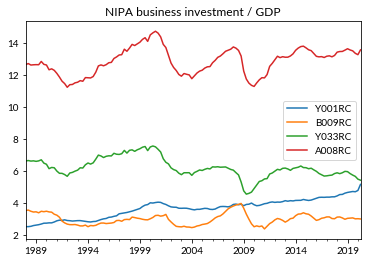

In [120]:
df1.plot(title='NIPA business investment / GDP');

In [96]:
s = ['W987RC']
df2 = nipa_df(retrieve_table('T50100')['Data'], s)
df['Gross Investment'] = df2.divide(gdp, axis=0)

In [98]:
df2.divide(gdp, axis=0)

,W987RC
1988-01-01,0.131268
1988-04-01,0.132443
1988-07-01,0.131259
1988-10-01,0.131529
1989-01-01,0.136470
...,...
2019-04-01,0.134665
2019-07-01,0.133664
2019-10-01,0.130524
2020-01-01,0.127523


##### Gross, Net, Depreciation

In [131]:
nipa_df(retrieve_table('T50100')['Data'], s).join(data['A008RC'])

NameError: name 'data' is not defined

In [126]:
s = ['W790RC', 'W276RC', 'W987RC']

df = nipa_df(retrieve_table('T50100')['Data'], s).append()
gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']
res = (df.div(gdp, axis=0) * 100).dropna()
res['A008RC'] = df1['A008RC']
res.loc['1989':].to_csv(data_dir / 'businv_main.csv', index_label='date')

ltdate1 = dtxt(df.index[-1])['qtr1']
ltdate2 = dtxt(df.index[-1])['qtr2']

levels = {}
shgdp = {}
for series in ['W790RC', 'W276RC', 'W987RC', 'A008RC']:
    level_val = df[series].iloc[-1] / 1_000
    n = ''
    if level_val < 0:
        n = 'negative '
        level_val = abs(level_val)
    txt = f"{n}\${level_val:,.0f} billion"
    levels[series] = txt
    shgdp[series] = f"{res[series].iloc[-1]:.1f} percent of GDP"
alsoor = 'or'    
if shgdp['W276RC'] == shgdp['W987RC']:
    alsoor = 'also'
    
diff = ((df['W987RC'].iloc[-1] / df.loc['2019-10-01', 'W987RC']) - 1) * 100
gdt = value_text(diff)
diff2 = ((df['W790RC'].iloc[-1] / df.loc['2019-10-01', 'W790RC']) - 1) * 100
if diff2 < -95:
    ndt = 'but collapsed completely'
else:
    ndt = 'and ' + value_text(diff2)
gpcl = f"{n}\${df.loc['2019-10-01', 'W987RC'] / 1_000:,.0f} billion"
npcl = f"{n}\${df.loc['2019-10-01', 'W790RC'] / 1_000:,.0f} billion"
if diff < 0:
    txt = 'as gross investment fell while deprecation was relatively constant'
else:
    txt = 'as gross investment recovered from its pandemic lows'
    
text = (f'In the {ltdate2}, gross private business investment totals '+
        f'{levels["W987RC"]} on a seasonally-adjusted annualized basis, '+
        f'equivalent to {shgdp["W987RC"]} '+
        '(see {\color{blue!60!violet}\\textbf{---}}). Private business fixed '+
        f'investment totals {levels["A008RC"]}, or {shgdp["A008RC"]} '+
        '(see {\color{cyan!80!white}\\textbf{---}}). Private business depreciation '+
        f'totals {levels["W276RC"]} in the quarter, {alsoor} {shgdp["W276RC"]} '+
        '(see {\color{magenta}\\textbf{---}}). '+
        f'As a result, net investment is {levels["W790RC"]}, or {shgdp["W790RC"]} '+
        '(see {\color{green!80!blue}\\textbf{---}}). \n\n '+
        'In 2019 Q4, prior to the COVID-19 pandemic, private business gross '+
        f'investment was {gpcl}. Since 2019 Q4, annualized gross investment {gdt}. '+
        f'Net investment was {npcl} in 2019 Q4, {ndt} from 2019 Q4 to {ltdate1}, '+
        f'{txt}. ')
write_txt(text_dir / 'businv_levels.txt', text)
print(text)    

KeyError: 'A008RC'

### Durable goods new orders

In [9]:
# New orders for capital goods excluding defense or aircraft
key = census_key
base = 'https://api.census.gov/data/timeseries/eits/advm3'
param = 'cell_value,time_slot_id'
t = '&time=from+1992'
cat = '&category_code=NXA'
dtc = '&data_type_code=NO'
oth = '&for=us&seasonally_adj=yes'
url = f'{base}?get={param}&key={key}{cat}{dtc}{t}{oth}'

r = requests.get(url).json()

df = pd.DataFrame({'date': [pd.to_datetime(i[4]) for i in r[1:]], 
                   'value': [float(i[0]) for i in r[1:]]}).sort_values('date')

df = df.set_index('date')

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])

result = ((df['value'].resample('QS').sum() * 4  / gdp['A191RC']).dropna() * 100).iloc[1:]
(result.rename('value').loc['1989':].to_csv(data_dir / 'dgno.csv', index_label='date', header=True))

node = end_node(result, 'purple!50!violet')
write_txt(text_dir / 'dgno_node.txt', node)

ldate = dtxt(df.index[-1])['mon1']
date_latest = dtxt(df.index[-1])['datetime']
month_short = df.index[-1].strftime('%b')

In [10]:
one_yr_ch = (df.pct_change(12) * 100).dropna()['value'].iloc[-1]
val = inc_dec_percent(one_yr_ch)

text = ('New orders for manufactured core capital goods excluding aircraft '+
        f'totalled \${df.iloc[-1][0] / 1000:,.0f} billion in {ldate}, '+
        f'equivalent to {result.iloc[-1]:.1f} percent of GDP '+
        '(see {\color{purple!50!violet}\\textbf{---}}). New orders '+
        f'{val} over the past year.')

write_txt(text_dir / 'dgno.txt', text)
print(text)

text = ('xtick={{1992-01-01}, {1995-01-01}, {2000-01-01}, {2005-01-01}, '+
f'{{2010-01-01}}, {{2015-01-01}}, {{{date_latest}}}}}, '+
f'xticklabels={{`92, `95, `00, `05, `10, `15, {month_short}}}, ')

text_full = ('\\begin{tikzpicture}'+
'\\begin{axis}[\\bbar{y}{0}, \dateaxisticks ytick={4, 6, 8}, width=6.4cm, height=5.4cm,'+
'ymin=3.0, clip=false,'+
text + 
'minor xtick={}]'+
'\\rebars'+
'\\thickline{purple!50!violet}{date}{value}{data/dgno.csv}'+
'\input{text/dgno_node.txt}'+
'\end{axis}'+
'\end{tikzpicture}')

write_txt(text_dir / 'dgno.tex', text_full)

New orders for manufactured core capital goods excluding aircraft totalled \$68 billion in August 2020, equivalent to 3.9 percent of GDP (see {\color{purple!50!violet}\textbf{---}}). New orders increased by 2.8 percent over the past year.


### Government spending and investment

In [27]:
n = {'A822RY': 'Total',
     'A823RY': '\hspace{1mm}Federal total',
     'A824RY': '\hspace{1mm}\cbox{blue!60!black}National defense',
     'A997RY': '\hspace{7mm}Consumption expenditures',
     'A788RY': '\hspace{7mm}Gross investment',
     'A825RY': '\hspace{1mm}\cbox{green!85!black}Nondefense',
     'A542RY': '\hspace{7mm}Consumption expenditures',
     'A798RY': '\hspace{7mm}Gross investment',
     'A829RY': '\hspace{-2mm}\cbox{purple!70!magenta}State \& local total',
     'A991RY': '\hspace{5mm}Consumption expenditures',
     'A799RY': '\hspace{5mm}Gross investment'}

s = n.keys()

df = nipa_df(retrieve_table('T10502')['Data'], s)
df.loc['1989':].to_csv(data_dir / 'gov.csv', index_label='date')

d = series_info(df['A822RY'])    
d2 = {}
for i in ['A824RY', 'A825RY', 'A829RY']:
    d2[i] = cont_subt(df[i].iloc[-1], 'end')
    
ltmain = cont_subt(d['val_latest'], 'main')
compare = compare_text(d['val_latest'], d['one_year_mean'], [0.05, 0.25, 0.5])
compare2 = compare_text(d['val_latest'], d['mean'], [0.05, 0.25, 0.5])

ltoym = f'{d["one_year_mean"]:.2f} ' + ['percentage point' if abs(d["one_year_mean"]) < 1.05 else 'percentage points'][0]
ltmean = f'{d["mean"]:.2f} ' + ['percentage point' if abs(d["mean"]) < 1.05 else 'percentage points'][0]
    
txt = ('Government consumption expeditures and gross investment, which provide '+
       f'services and infrastructure, {ltmain} real GDP growth in {d["date_latest_ft"]}, '+
       f'{compare} the average contribution of {ltoym} '+
       f'over the past year, and {compare2} the average of {ltmean} since 1989. '+
       f'In {d["date_latest_ft"]}, federal defense spending and investment (see\cbox{{blue!60!black}}) '+
       f'{d2["A824RY"]}, nondefense federal government spending and investment '+
       f'(see\cbox{{green!85!black}}) {d2["A825RY"]}, and state and '+
       f'local government (see\cbox{{purple!70!magenta}}) {d2["A829RY"]}.')
write_txt(text_dir / 'gov.txt', txt)
print(txt)

Government consumption expeditures and gross investment, which provide services and infrastructure, contributed 0.77 percentage point to real GDP growth in 2020 Q2, substantially above the average contribution of 0.45 percentage point over the past year, and far above the average of 0.24 percentage point since 1989. In 2020 Q2, federal defense spending and investment (see\cbox{blue!60!black}) contributed 0.18 percentage point, nondefense federal government spending and investment (see\cbox{green!85!black}) contributed 0.98 percentage point, and state and local government (see\cbox{purple!70!magenta}) subtracted 0.40 percentage point.


In [28]:
result = df[n.keys()]

data = result.iloc[-5:].iloc[::-1].T

cols = [f' {q.year} Q{q.quarter}' 
        if i == 0 else f'`{str(q.year)[2:]} Q{q.quarter}'
        for i, q in enumerate(data.columns)]

data.columns = cols
data['3-year'] = result.rolling(13).mean().iloc[-1].round(2)
data['10-year'] = result.rolling(41).mean().iloc[-1].round(2)
data['30-year'] = result.rolling(121).mean().iloc[-1].round(2)
data.index = data.index.map(n)
data = data.applymap('{:.2f}'.format)
data.to_csv(data_dir / 'gov.tex', sep='&', line_terminator='\\\ ', quotechar=' ')

### Government receipts and expenditures

In [29]:
gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']

d = {'slggdp': {'name': 'combined state and local government', 
                'table': 'T30300', 'series': 
                {'W024RC': 'SLG_EXP', 'W023RC': 'SLG_REC'}},
     'fedgdp': {'name': 'federal government', 
                'table': 'T30200', 'series':
                {'W005RC': 'FED_REC', 'W013RC': 'FED_EXP'}}}

data = pd.DataFrame()

ltdate = dtxt(gdp.index[-1])['qtr1']

for group, details in d.items():
    df = nipa_df(retrieve_table(details['table'])['Data'], details['series'].keys())
    (df.div(gdp, axis=0) * 100).loc['1989':].to_csv(data_dir / f'{group}.csv', 
                                                    index_label='date', float_format='%g')
    
    grp = group[:3].upper()
    df.columns = [details['series'][i] for i in df.columns]
    bal = df[f'{grp}_REC'] - df[f'{grp}_EXP']
    bal_lt = bal.dropna().iloc[-1]
    bal_lt_dt = dtxt(bal.dropna().index[-1])['qtr1']
    def_sur = 'deficit' if bal_lt < 0 else 'surplus'
    df[f'{grp}_BAL'] = bal
    
    for col in df.columns:
        data[col] = df[col]
        data[col+'_GDP'] = df[col].div(gdp, axis=0) * 100
        
    bal_gdp = data[f'{grp}_BAL_GDP'].dropna().iloc[-1]
    bal_txt = (f'In {bal_lt_dt}, the {d[group]["name"]} {def_sur} was '+
               f'\${abs(bal_lt) / 1000:,.0f} billion or {abs(bal_gdp):.1f} percent of GDP. ')
    
    exp_txt = (f'{d[group]["name"].capitalize()} expenditures total '+
               f'\${data[grp+"_EXP"].iloc[-1] / 1000000:.1f} trillion, '+
               f'or {data[grp+"_EXP_GDP"].iloc[-1]:.1f} percent of GDP, in {ltdate}. ')
    
        
    if pd.isna(df[[i for i in df.columns if i[4:] == 'REC'][0]].iloc[-1]) == True:
        rec_txt = (f'BEA has not yet released receipts data for {ltdate}, however, '+
                   f'in {bal_lt_dt}, {d[group]["name"]} receipts total '+
                   f'\${data[grp+"_REC"].dropna().iloc[-1] / 1000000:.1f} trillion, '+
                   f'or {data[grp+"_REC_GDP"].dropna().iloc[-1]:.1f} percent of GDP. ')
    else:
        rec_txt = ('Receipts for the same period total '+
                   f'\${data[grp+"_REC"].dropna().iloc[-1] / 1000000:.1f} trillion '+
                   f'or {data[grp+"_REC_GDP"].dropna().iloc[-1]:.1f} percent of GDP. ')
    
    text = exp_txt + rec_txt + bal_txt
    write_txt(text_dir / f'{group}.txt', text)
    print(text)

Combined state and local government expenditures total \$3.0 trillion, or 15.3 percent of GDP, in 2020 Q2. Receipts for the same period total \$3.5 trillion or 17.7 percent of GDP. In 2020 Q2, the combined state and local government surplus was \$470 billion or 2.4 percent of GDP. 
Federal government expenditures total \$9.1 trillion, or 46.7 percent of GDP, in 2020 Q2. Receipts for the same period total \$3.5 trillion or 17.7 percent of GDP. In 2020 Q2, the federal government deficit was \$5,648 billion or 28.9 percent of GDP. 


### Public Debt by Holder

In [30]:
series = ['FDHBATN', 'GFDEBTN', 'FDHBFRBN', 'FDHBPIN', 'FDHBFIN']
start = '1988-01-01'
ftype = '&file_type=json'
base = 'https://api.stlouisfed.org/fred/series/observations?'

df = pd.DataFrame()

for srs in series:
    param = f'series_id={srs}&observation_start={start}&api_key={fred_key}'
   

    url = f'{base}{param}{ftype}'
    r = requests.get(url).json()['observations']
    data = pd.Series({i['date']: (float(i['value']) / 1000.0) 
                      if srs in series[:2] 
                      else float(i['value']) for i in r})
    
    df[srs] = data

In [31]:
df = df.dropna()
df['PD'] = df['FDHBPIN'] - df['FDHBFIN']
df['IG'] = df['GFDEBTN'] - (df['FDHBFRBN'] + df['FDHBPIN'])

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']

data = df.div(gdp / 1000.0, axis=0).dropna()

(data[['PD', 'FDHBFIN', 'FDHBFRBN', 'IG']] * 100).to_csv(data_dir / 'pubdebt.csv', index_label='date')

ld = pd.to_datetime(df.index[-1])
ldate = dtxt(ld)['qtr2']

sh = df.div(df['GFDEBTN'], axis=0).iloc[-1] * 100
lv = df.iloc[-1] / 1000
dl = data.iloc[-1] * 100

text = (f'In {ldate}, total public debt was \${lv.GFDEBTN:.1f} trllion, '+
        f'equivalent to {dl.GFDEBTN:.1f} percent of GDP. Of this, \${lv.PD:.1f} '+
        f'trillion, or {sh.PD:.1f} percent of the total, is held by '+
        'private domestic investors (see\cbox{green!60!black}). An additional '+
        f'\${lv.FDHBFIN:.1f} trillion, or {sh.FDHBFIN:.1f} percent '+
        'of the total, is held by foreign investors (see\cbox{orange!70!white}). '+
        'The remainder is held by the Federal Reserve (see\cbox{blue}) '+
        'and various government agencies and trusts (see\cbox{cyan!50!white}), '+
        'such as the Social Security Trust Fund. ')
write_txt(text_dir / 'pubdebt.txt', text)
print(text)

In the second quarter of 2020, total public debt was \$26.5 trllion, equivalent to 135.6 percent of GDP. Of this, \$9.3 trillion, or 35.1 percent of the total, is held by private domestic investors (see\cbox{green!60!black}). An additional \$7.0 trillion, or 26.6 percent of the total, is held by foreign investors (see\cbox{orange!70!white}). The remainder is held by the Federal Reserve (see\cbox{blue}) and various government agencies and trusts (see\cbox{cyan!50!white}), such as the Social Security Trust Fund. 


### Personal Income

In [32]:
s = ['DPCERG']

d = nipa_df(retrieve_table('T20304')['Data'], s)['DPCERG']
deflator = d.iloc[-1] / d

s = ['A065RC', 'A033RC', 'A041RC', 'A048RC', 'W210RC', 'A577RC', 'A061RC']

df = (nipa_df(retrieve_table('T20100')['Data'], s)
      .assign(CAPITAL = lambda x: x['A041RC'] + x['A048RC'] + x['W210RC'],
              TRANSFER = lambda x: x['A577RC'] - x['A061RC'])
      .drop(['A061RC', 'A041RC', 'A048RC', 'W210RC', 'A577RC'], axis=1)
      .multiply(deflator, axis=0))
growth_contrib(df, 'A065RC').loc['1989':].to_csv(data_dir / 'pi.csv', index_label='date')


data = growth_contrib(df, 'A065RC').rename({'A065RC': 'TOTAL', 'A033RC': 'LABOR'}, axis=1)

val3y = data.rolling(12).mean().iloc[-1]

ltdate = dtxt(data.index[-1])['qtr1']

d = {}
for i in data.keys():
    val = data[i].iloc[-1]
    pp = 'percentage points' if abs(val) > 1.05 else 'percentage point'
    if val >= 0.1:
        d[i] = f'contributed {val:.2f} {pp} to'
    elif val <= 0.1:
        d[i] = f'subtracted {abs(val):.2f} {pp} from'
    else:
        d[i] = 'did not contribute significantly to'
        
d['TOTAL'] = (d['TOTAL']
              .replace('contributed', 'increased at an annualized rate of')
              .replace('subtracted', 'decreased at an annualized rate of')
              .replace('percentage points', 'percent')
              .replace(' to', '').replace(' from', ''))

for i in ['TRANSFER', 'CAPITAL']:
    d[i] = d[i].replace(' to', '').replace(' from', '')
    
d2 = {}
for i in data.keys():
    val = val3y[i]
    pp = 'percentage points' if abs(val) > 1.05 else 'percentage point'
    if val >= 0.1:
        d2[i] = f'contributed an average of {val:.2f} {pp}'
    elif val <= 0.1:
        d2[i] = f'subtracted an average of {abs(val):.2f} {pp}'
    else:
        d2[i] = 'did not contribute significantly, on average'
        
text = (f'Aggregate real personal income {d["TOTAL"]} in {ltdate}. '+
        f'Labor income {d["LABOR"]} overall growth, '+
        f'capital income {d["CAPITAL"]}, and welfare income {d["TRANSFER"]}. ')
write_txt(text_dir / 'pi.txt', text)
print(text)

Aggregate real personal income increased at an annualized rate of 36.37 percent in 2020 Q2. Labor income subtracted 17.85 percentage points from overall growth, capital income subtracted 6.03 percentage points, and welfare income contributed 60.25 percentage points. 


### Consumer Spending Growth Contributions

In [33]:
s = ['B230RC']

population = nipa_df(retrieve_table('T20100')['Data'], s)['B230RC']

s = ['DPCERG']

d = nipa_df(retrieve_table('T20304')['Data'], s)['DPCERG']
deflator = d.iloc[-1] / d

s = ['A067RC', 'A068RC', 'A071RC', 'DPCERC']

df = (nipa_df(retrieve_table('T20100')['Data'], s)
      .assign(OTHER = lambda x: -(x['A068RC'] - x['DPCERC']),
              SAVING = lambda x: -x['A071RC'])
      .drop(['A068RC'], axis=1)
      .divide(population, axis=0)
      .multiply(deflator, axis=0))

data = growth_contrib(df, 'DPCERC').rolling(4).mean()
data3y = growth_contrib(df, 'DPCERC').rolling(12).mean()
data.loc['1989':].to_csv(data_dir / 'pcedecomp.csv', index_label='date')

In [34]:
date = f'{data.index[-1].year} Q{data.index[-1].quarter}'

pce = round(data['DPCERC'].iloc[-1], 1)
if pce > 0:
    pcedir = 'increased'
elif pce < 0:
    pcedir = 'decreased'
else: 
    pcedir = ''
pcetext = f'{pcedir} at an average rate of {abs(pce):.1f} percent' 
if pce == 0:
    pcetext = 'was unchanged'
    
slist = ['A067RC', 'SAVING', 'OTHER']
d = {}
for i in slist:
    d[i] = round(data[i].iloc[-1], 1)
    tname = f'{i}txt'
    if d[i] > 0:
        tmpdir = 'added'
    elif d[i] < 0:
        tmpdir = 'subtracted'
    else:
        tmpdir = ''
    tmptxt = f'{tmpdir} {abs(d[i]):.1f} percentage points'
    if d[i] == 0:
        tmptxt = "didn't affect the total"
    d[tname] = tmptxt

In [35]:
pcetxt1 = (f'Real per capita consumer spending {pcetext} over the '+
           f'four quarters ending {date}. Changes to disposable income '+
           f'{d["A067RCtxt"]}, changes to saving {d["SAVINGtxt"]}, and '+
           f'changes to other outlays {d["OTHERtxt"]}.')

pcetxt2 = ('Over the past three years, real per capita consumer spending '+
           f'growth has averaged {data3y["DPCERC"].iloc[-1]:.1f} percent, '+
           f'with income growth contribuing an average of {data3y["A067RC"].iloc[-1]:.1f} '+
           'percentage points and saving subtracting an average of '+
           f'{abs(data3y["SAVING"].iloc[-1]):.1f} percentage points.')

pcetxt = f'{pcetxt1} {pcetxt2}'

write_txt(text_dir / 'pcedecomp.txt', pcetxt)

print(pcetxt1)

print(pcetxt2)

Real per capita consumer spending decreased at an average rate of 9.4 percent over the four quarters ending 2020 Q2. Changes to disposable income added 11.2 percentage points, changes to saving subtracted 21.2 percentage points, and changes to other outlays added 0.5 percentage points.
Over the past three years, real per capita consumer spending growth has averaged -1.7 percent, with income growth contribuing an average of 5.4 percentage points and saving subtracting an average of 7.1 percentage points.


### Sectoral Accounts

**NOTE:** Need to convert "deficit", "borrower" etc to parameters!

In [36]:
s = ['W162RC', 'W994RC', 'AD01RC', 'W995RC', 'W996RC', 'AD03RC']
df = (nipa_df(retrieve_table('T50100')['Data'], s).div(
      nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC'], axis=0)) * 100

df[['W995RC', 'W996RC', 'AD03RC']].dropna().to_csv(data_dir / 'sectbal2.csv', index_label='date')

data = pd.DataFrame()
data['PRIV'] = df['W994RC']
data['GOV'] = df['AD01RC']
data['ROW'] = -df['W162RC']
data = data.dropna()
date = dtxt(data.index[-1])['qtr1']
datepr = '2015-01-01'
dateprtxt = dtxt(pd.to_datetime(datepr))['qtr1']
yrpr = dtxt(pd.to_datetime(datepr))['year']

data.dropna().to_csv(data_dir / 'sectbal.csv', index_label='date')

priv_curr = abs(data['PRIV'].iloc[-1])
priv_prev = abs(data.loc[datepr, 'PRIV'])
gov_curr = abs(data['GOV'].iloc[-1])
gov_prev = abs(data.loc[datepr, 'GOV'])
row_curr = abs(data['ROW'].iloc[-1])
row_prev = abs(data.loc[datepr, 'ROW'])

compare = compare_text(priv_curr, priv_prev, [0.4, 1.0, 3.5])

sectbaltxt = (f"In {date}, the US private sector was a net lender (running a surplus) of "+
              f"the equivalent of {priv_curr:.1f} percent of GDP, {compare} the {priv_prev:.1f} "+
              f"percent surplus in {dateprtxt}. The rest of the world was a net lender to the US, to the "+
              f"equivalent of {row_curr:.1f} percent of GDP in {date} compared to {row_prev:.1f} "+
              f"percent in {dateprtxt}. Balancing these transactions, the government (federal, state, "+
              f"and local combined) was a net borrower (running a deficit) of the equivalent "+
              f"of {gov_curr:.1f} percent of GDP, compared to {gov_prev:.1f} percent in {yrpr}. ")

write_txt(text_dir / 'sectbal.txt', sectbaltxt)
print(sectbaltxt)

dt = df.dropna().index[-1]
ltdate = dtxt(dt)['qtr1']
hhsh = df.loc[dt, 'W996RC']
pbussh = f"{df.loc[dt, 'W995RC']:.1f} percent of GDP"

if (df.loc[dt, 'W995RC'] > -0.1) & (df.loc[dt, 'W995RC'] < 0.1):
    pbussh = 'unchanged'
    
text = (f'Within the private sector, households were net lenders of the equivalent of {hhsh:.1f} '+
        f'percent of GDP in {ltdate} (see\cbox{{orange!90!yellow}}), while the '+
         'net financial balance of private businesses--corporate and noncorporate--was '+
        f'equivalent to {pbussh} (see\cbox{{purple!50!red}}).')  

write_txt(text_dir / 'sectbal2.txt', text)
print('\n', text)

In 2020 Q2, the US private sector was a net lender (running a surplus) of the equivalent of 24.6 percent of GDP, far above the 2.6 percent surplus in 2015 Q1. The rest of the world was a net lender to the US, to the equivalent of 2.9 percent of GDP in 2020 Q2 compared to 2.4 percent in 2015 Q1. Balancing these transactions, the government (federal, state, and local combined) was a net borrower (running a deficit) of the equivalent of 27.5 percent of GDP, compared to 5.0 percent in 2015. 

 Within the private sector, households were net lenders of the equivalent of 23.3 percent of GDP in 2020 Q2 (see\cbox{orange!90!yellow}), while the net financial balance of private businesses--corporate and noncorporate--was equivalent to 1.2 percent of GDP (see\cbox{purple!50!red}).


### Current Account Balance

In [37]:
s = ['A191RC']

gdp = nipa_df(retrieve_table('T10105')['Data'], s)

n = {'A1073C': 'Current receipts',
     'B020RC': '\hspace{1mm}Exports',
     'A253RC': '\hspace{3mm}Goods',
     'A332RC': '\hspace{5mm}Durable',
     'A339RC': '\hspace{5mm}Nondurable',
     'A646RC': '\hspace{3mm}Services',
     'B645RC': '\hspace{1mm}Income receipts',
     'LA000035': '\hspace{1mm}Transfer receipts',
     'W163RC': 'Current payments',
     'B021RC': '\hspace{1mm}Imports',
     'A255RC': '\hspace{3mm}Goods',
     'A333RC': '\hspace{5mm}Durable',
     'A340RC': '\hspace{5mm}Nondurable',
     'B656RC': '\hspace{3mm}Services',
     'A655RC': '\hspace{1mm}Income payments',
     'A123RC': '\hspace{1mm}Transfer payments',
     'A124RC': 'Current account balance'}

s = ['A124RC', 'GOODS', 'SERVICES', 'INCOME', 'TRANSFERS']

df = (nipa_df(retrieve_table('T40100')['Data'], n.keys())
      .assign(GOODS = lambda x: x['A253RC'] - x['A255RC'],
              SERVICES = lambda x: x['A646RC'] - x['B656RC'],
              INCOME = lambda x: x['B645RC'] - x['A655RC'],
              TRANSFERS = lambda x: - x['A123RC']))

data = (df.div(nipa_df(retrieve_table('T10105')['Data'], ['A191RC']
               )['A191RC'], axis=0).loc['1989':].multiply(100).round(2))

data[s].dropna().to_csv(data_dir / 'cab.csv', index_label='date')

cab = abs(data.dropna()['A124RC'].iloc[-1])
tb = abs(data.dropna()['GOODS'].iloc[-1])
ld = dtxt(data.dropna().index[-1])['qtr1']
ltdate = dtxt(data.index[-1])['qtr1']
prdate = dtxt(data.index[-2])['qtr1']
lttbval = abs(data['GOODS'].iloc[-1])
tbprval = abs(data['GOODS'].iloc[-2])
prval = abs(data['A124RC'].iloc[-2])


if pd.isna(data['A124RC'].iloc[-1]) == True:
    mtxt = (f'The initial GDP report for {ltdate} does not include the '+
            'data needed to calculate the current account balance, however, '+
            f'the goods trade deficit for {ltdate} is equivalent to '+
            f'{lttbval:.1f} percent of GDP. ')
else:
    mtxt = (f'In {prdate}, the current account deficit was equivalent to '
            f'{prval:.1f}, and the trade deficit was equivalent to '+
            f'{tbprval:.1f} percent of GDP.')

text = (f'As of {ld}, the US runs a current account deficit of {cab:.1f} '+
        'percent of GDP, primarily as the result of a trade deficit on '+
        f'goods of {tb:.1f} percent of GDP. {mtxt}')
write_txt(text_dir / 'cab.txt', text)
print(text)

As of 2020 Q2, the US runs a current account deficit of 2.9 percent of GDP, primarily as the result of a trade deficit on goods of 4.1 percent of GDP. In 2020 Q1, the current account deficit was equivalent to 2.0, and the trade deficit was equivalent to 3.6 percent of GDP.


In [38]:
result = data[n.keys()]
data2 = result.iloc[-6:].iloc[::-1].T

cols = [f' {q.year} Q{q.quarter}' 
        if i == 0 else f'`{str(q.year)[2:]} Q{q.quarter}'
        for i, q in enumerate(data2.columns)]

data2.columns = cols
data2['3-year'] = result.rolling(13).mean().iloc[-1].round(2)
data2['10-year'] = result.rolling(41).mean().iloc[-1].round(2)
data2.index = data2.index.map(n)
data2 = data2.applymap('{:.2f}'.format).replace('nan', '--')
data2.to_csv(data_dir / 'cab.tex', sep='&', line_terminator='\\\ ', quotechar=' ')

### Federal Interest Outlays share of GDP

In [39]:
tot = fred_df('FYOINT')['VALUE']
fy = tot.index[-1].year
pfy = tot.index[-2].year
lttot = tot.iloc[-1] / 1000
prtot = tot.iloc[-2] / 1000

data = fred_df('FYOIGDA188S')['VALUE']
data.index = data.index + pd.DateOffset(months=6)
data.to_csv(data_dir / 'fedintexp.csv', index_label='date', header=True)

latest = data.iloc[-1]
pval = data.iloc[-2]
val90s = data.loc['1990':'1999'].mean()


text = (f'The Office of Management and Budget '+
        '\href{https://www.whitehouse.gov/omb/historical-tables/}{reports} '+
        f'federal interest outlays of \${lttot:.1f} billion in fiscal year {fy}, '+
        f'compared to \${prtot:.1f} billion in fiscal year {pfy}. '+
        f'Put into the context of the size of the economy, federal interest '+
        f'outlays in {fy} were equivalent to {latest:.1f} percent of '+
        f'GDP, {pval:.1f} percent of GDP in {pfy}, and an average of {val90s:.1f} '+
        'percent in the 1990s, when interest rates were substantially higher. ')
write_txt(text_dir / 'fedintexp.txt', text)
print(text)

node = end_node(data, 'magenta')
write_txt(text_dir / 'fedintexp_node.txt', node)

The Office of Management and Budget \href{https://www.whitehouse.gov/omb/historical-tables/}{reports} federal interest outlays of \$375.2 billion in fiscal year 2019, compared to \$325.0 billion in fiscal year 2018. Put into the context of the size of the economy, federal interest outlays in 2019 were equivalent to 1.8 percent of GDP, 1.6 percent of GDP in 2018, and an average of 2.9 percent in the 1990s, when interest rates were substantially higher. 


In [ ]:
#nipa_series_codes(retrieve_table('T20100'))

### Corporate Profits Destination

In [40]:
s = ['A032RC', 'A438RC', 'A054RC', 'B056RC', 'A127RC']
cprof = (nipa_df(retrieve_table('T11200')['Data'], s) / 1000000).dropna()

cprof['NNI'] = cprof['A032RC'] - cprof['A438RC']
cprof['TAX'] = cprof['A054RC'] / cprof['NNI'] * 100 
cprof['DIV'] = cprof['B056RC'] / cprof['NNI'] * 100 
cprof['RE'] = cprof['A127RC'] / cprof['NNI'] * 100 

cprof[['TAX', 'DIV', 'RE']].loc['1989':].to_csv(data_dir / 'cprof.csv', index_label='date')

dt = cprof.index[-1]
ltdate = dtxt(cprof.index[-1])['qtr2']
tot = cprof.loc[dt, ['A054RC', 'B056RC', 'A127RC']].sum()
totsh = tot / cprof.loc[dt, 'NNI'] * 100
div = cprof.loc[dt, 'B056RC']
divsh = div / cprof.loc[dt, 'NNI'] * 100
ret = cprof.loc[dt, 'A127RC']
tax = cprof.loc[dt, 'A054RC']

text = (f'In {ltdate}, aggregate corporate profits were \${tot:.2f} trillion, or {totsh:.1f} '+
        f'percent of net national income. Of this, \${div:.2f} trillion, equivalent to {divsh:.1f} '+
        'percent of net national product, were paid out as dividends (see\cbox{blue!70!purple}), '+
        f'\${ret*1000:.0f} billion were retained (see\cbox{{cyan!50!white}}), and \${tax*1000:.0f} '+
        'billion went to corporate income tax (see\cbox{red!80!orange}). ')
write_txt(text_dir / 'cprof.txt', text)
print(text)

In the second quarter of 2020, aggregate corporate profits were \$1.83 trillion, or 12.9 percent of net national income. Of this, \$1.36 trillion, equivalent to 9.6 percent of net national product, were paid out as dividends (see\cbox{blue!70!purple}), \$225 billion were retained (see\cbox{cyan!50!white}), and \$237 billion went to corporate income tax (see\cbox{red!80!orange}). 


### Corporate profits source

In [41]:
s = ['W170RC', 'A262RC', 'W986RC', 'A922RC']
df1 = nipa_df(retrieve_table('T50100')['Data'], s)

s = ['A123RC']
df2 = nipa_df(retrieve_table('T40100')['Data'], s)

s = ['A001RC']
df3 = nipa_df(retrieve_table('T10705')['Data'], s)

cprof = pd.DataFrame()
cprof['ROW Saving'] = (df2['A123RC'] / df3['A001RC']) * 100
cprof['HH Saving'] = (- df1['W986RC'] / df3['A001RC']) * 100
cprof['Gov Saving'] = (- df1['A922RC'] / df3['A001RC']) * 100
cprof['Investment'] = ((df1['W170RC'] - df1['A262RC']) / df3['A001RC']) * 100

cprof.loc['1989':].to_csv(data_dir / 'cprof2.csv', index_label='date')

In [ ]:
#nipa_series_codes(retrieve_table('T50100'))

### Labor Productivity

In [6]:
# Series stored as a dictionary
series = {'PRS85006092': 'value',
          'PRS85006032': 'hours',
          'PRS85006042': 'output',
          'PRS84006033': 'hours_index'}

In [7]:
# Start year and end year
dates = (1989, 2020)
df = bls_api(series, dates, bls_key)

df.to_csv(data_dir / 'lprod.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [8]:
df = pd.read_csv(data_dir / 'lprod.csv')
df = df.set_index(pd.to_datetime(df['date']))
df = df.drop('date',axis=1)

d = series_info(df['value'])

s = {}

for srs in list(series.values()):
    s[srs] = {}
    tmp = series_info(df[srs])
    for i in ['val_latest', 'val_prev']:
        if tmp[i] > 0:
            s[srs][i] = f'increased at an annual rate of {tmp[i]:.1f} percent'
            s[srs][i+'2'] = f'an increase of {tmp[i]:.1f} percent'
        elif tmp[i] < 0:
            s[srs][i] = f'decreased at an annual rate of {abs(tmp[i]):.1f} percent'
            s[srs][i+'2'] = f'a decrease of {abs(tmp[i]):.1f} percent'
        else:
            s[srs][i] = 'was unchanged'
            s[srs][i+'2'] = 'no change'   
            
compare = compare_text(d["five_year_mean"], d["mean"], [0.1, 0.5, 2.0])
    
text = (f'In {d["date_latest_ft"]}, labor productivity {s["value"]["val_latest"]} '+
        f'(see\cbox{{teal}}), as the result of {s["output"]["val_latest2"]} in real ouput '+
        f'and {s["hours"]["val_latest2"]} in hours worked. In the prior quarter, '+
        f'{d["date_prev_ft"]}, labor productivity {s["value"]["val_prev"]}, as '+
        f'real output {s["output"]["val_prev"]} and hours of work {s["hours"]["val_prev"]}. '+
        f'Over the past five years, '+
        f'labor productivity growth has averaged {d["five_year_mean"]:.1f} percent, '+
        f'{compare} the 1989-onward average of {d["mean"]:.1f} percent.')

write_txt(text_dir / 'lprod.txt', text)
print(text)

text = (f'Total hours worked in nonfarm businesses {s["hours"]["val_latest"]} '+
        f'in {d["date_latest_ft"]}, following {s["hours"]["val_prev2"]} in '+
        f'{d["date_prev_ft"]}.')

write_txt(text_dir / 'tot_hours.txt', text)
print(text)

In 2020 Q2, labor productivity increased at an annual rate of 10.1 percent (see\cbox{teal}), as the result of a decrease of 37.1 percent in real ouput and a decrease of 42.9 percent in hours worked. In the prior quarter, 2020 Q1, labor productivity decreased at an annual rate of 0.3 percent, as real output decreased at an annual rate of 6.4 percent and hours of work decreased at an annual rate of 6.1 percent. Over the past five years, labor productivity growth has averaged 1.5 percent, substantially below the 1989-onward average of 2.0 percent.
Total hours worked in nonfarm businesses decreased at an annual rate of 42.9 percent in 2020 Q2, following a decrease of 6.1 percent in 2020 Q1.


### Gross Labor Income

In [4]:
s = {'LNS12005054': 'Hours', 'LNS12000000': 'Employment'}
df = bls_api(s, (1989, 2020), bls_key)
df['Total'] = df['Hours'] * df['Employment']
df.to_csv(data_dir / 'emp_hrs.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [5]:
emp = (pd.read_csv(data_dir / 'emp_hrs.csv', parse_dates=[0])
         .set_index('date')['Total'])
coe = nipa_df(retrieve_table('T20100')['Data'], ['A033RC'])
pce = nipa_df(retrieve_table('T20304')['Data'], ['DPCERG'])
data = coe.join(pce).join(emp.resample('QS').mean()).dropna()
data['real_coe'] = data['A033RC'] / (data['DPCERG'] / data['DPCERG'].iloc[-1])
data['coe_inp'] = data['real_coe'] / data['Total']
data['wage'] = data['coe_inp'] * data['Total'].iloc[0]
data['work'] = data['real_coe'] - data['wage']

# Calculate contributions to growth
result = growth_contrib(data, 'real_coe')[['work', 'wage']]
result.dropna().loc['1989':]
result.to_csv(data_dir / 'gli.csv', index_label='date')

ltdate = dtxt(result.index[-1])['qtr1']
totval = result.iloc[-1].sum()
wage = result['wage'].iloc[-1]
work = result['work'].iloc[-1]

incdec = 'increased' if totval > 0 else 'decreased'
txt1 = (f'{incdec} at an annualized and inflation-adjusted '+
        f'rate of {abs(totval):.2f} percent')

if totval == 0:
    txt1 = 'was unchanged, after adjusting for inflation,'
    
txt2 = cont_subt(wage, style='end')
txt3 = cont_subt(work, style='end')

text = (f'{txt1} in {ltdate}. Changes in wages {txt2}, '+
        f'and changes in total hours worked {txt3}.')
write_txt(text_dir / 'gli.txt', text)
print(text)

decreased at an annualized and inflation-adjusted rate of 23.32 percent in 2020 Q2. Changes in wages contributed 26.80 percentage points, and changes in total hours worked subtracted 50.12 percentage points.


### Financial Obligations Ratio

In [3]:
base = 'https://www.federalreserve.gov/datadownload/Output.aspx?'
srs = 'rel=FOR&series=6d253f59629f788ab250a7a30662e79e&lastobs=&'
dt = 'from=01/01/1989&to=12/31/2020&'
oth = 'filetype=csv&label=include&layout=seriescolumn'
url = base + srs + dt + oth

d, clean_data = clean_fed_data(url)

d = {k: v.replace(', seasonally adjusted', '') for k, v in d.items()}

data = clean_data.rename(d, axis=1)['Financial obligations ratio']
data.to_csv(data_dir / 'for.csv', index_label='date')

node = end_node(data, 'blue!80!black')
write_txt(text_dir / 'for_node.txt', node)

ltdate = dtxt(data.index[-1])['qtr1']
ltval = data.iloc[-1]

text = (f'As of {ltdate} the financial obligations ratio is {ltval:.1f} percent')
write_txt(text_dir / 'for.txt', text)
print(text)

As of 2020 Q2 the financial obligations ratio is 13.6 percent


### Shiller real return trailing 20-year average

In [48]:
data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls', sheet_name='Data')
df1 = data.iloc[679:1801, np.r_[0, 14]]
df1.columns = ['Date', 'CATRPE']
df1.index = pd.to_datetime([f'{val:.2f}' for val in df1['Date'].values])
df1 = df1.loc[~df1.index.duplicated(keep='first')]
df1.loc['1989':, 'CATRPE'].to_csv(data_dir / 'catrpe.csv', index_label='date')

node = end_node(df1.CATRPE, 'blue!80!black', percent=False, date=True)
write_txt(text_dir / 'cape_node.txt', node)

df = data.iloc[679:1801, np.r_[0, 7, 8]]
df.columns = ['Date', 'Price', 'Dividend']
df.index = pd.to_datetime([f'{val:.2f}' for val in df['Date'].values])
df = df.loc[~df.index.duplicated(keep='first')]

In [49]:
for yrs in [10, 15, 20]:
    s = df.copy()
    mos = yrs * 12
    s['DY'] = (s['Dividend'] / s['Price']).rolling(mos).mean()
    s['Pch'] = s['Price'].pct_change(mos)
    s['Pch'] = (s['Pch']+1)**(1/yrs) - 1
    s = s.dropna()
    s['Return'] = (s['DY'] + s['Pch']) * 100
    s.loc['1989':].dropna().to_csv(data_dir / f'sp500rr{yrs}.csv', 
                                   index_label='date', float_format='%g')
    
text = ('According to historical stock market '+
        '\href{www.econ.yale.edu/~shiller/data.htm}{data} from Robert Shiller, '+
        'the inflation-adjusted trailing twenty year annual rate of return '+
        f'of the S\&P 500 was {s["Return"].iloc[-1]:.1f} percent as '+
        f'of {s.index[-1].strftime("%B %Y")}. Real returns are currently low relative '+
        'to the average trailing twenty year real annual return of '+
        f'{s["Return"].loc["1995":"2005"].mean():.1f} percent during 1995--2005.')

write_txt(text_dir / 'sp500rr3.txt', text)

print(text)

According to historical stock market \href{www.econ.yale.edu/~shiller/data.htm}{data} from Robert Shiller, the inflation-adjusted trailing twenty year annual rate of return of the S\&P 500 was 3.7 percent as of June 2020. Real returns are currently low relative to the average trailing twenty year real annual return of 10.1 percent during 1995--2005.


### High Quality Corporate Bond Yield

In [2]:
df = fred_df('HQMCB10YR')
df.to_csv(data_dir / 'hqcb.csv', index_label='date')
node = end_node(df['VALUE'], 'blue!60!violet', date=True)
write_txt(text_dir / 'hqcb_node.txt', node)

ltval = df.VALUE.iloc[-1]
prval = df.VALUE.iloc[-2]
prval2 = df.VALUE.iloc[-13]
ltdate = dtxt(df.index[-1])['mon1']
prdate = dtxt(df.index[-2])['mon1']
prdate2 = dtxt(df.index[-13])['mon1']

text = (f'This monthly measure shows a spot rate of {ltval:.1f} '+
        f'percent in {ltdate} for high-quality corporate bonds with '+
        f'a maturity of 10 years, following a rate of {prval:.1f} percent '+
        f'in {prdate}. In {prdate2}, the spot rate was {prval2:.1f} percent.')

write_txt(text_dir / 'hqcb.txt', text)
print(text)

This monthly measure shows a spot rate of 2.0 percent in August 2020 for high-quality corporate bonds with a maturity of 10 years, following a rate of 2.0 percent in July 2020. In August 2019, the spot rate was 2.9 percent.


### International Investment Position (IIP)

In [51]:
series = ['IIPUSLIAA', 'IIPUSASSA','GDPA']
df = pd.DataFrame()
for s in series:
    df[s] = fred_df(s)['VALUE']
    
series2 = ['IIPUSLIAQ', 'IIPUSASSQ', 'GDP']
df2 = pd.DataFrame()
for s in series2:
    df2[s] = fred_df(s)['VALUE']
    
data = pd.DataFrame()
data['Liab'] = (df.loc[:'2005', 'IIPUSLIAA'] / df.loc[:'2005', 'GDPA']) / 10
data['Assets'] = (df.loc[:'2005', 'IIPUSASSA'] / df.loc[:'2005', 'GDPA']) / 10
data2 = pd.DataFrame()
data2['Liab'] = (df2.loc[:, 'IIPUSLIAQ'] / df2.loc[:, 'GDP']) / 10
data2['Assets'] = (df2.loc[:, 'IIPUSASSQ'] / df2.loc[:, 'GDP']) / 10
result = data.append(data2)
result.to_csv(data_dir / 'iip.csv', index_label='date')

lt = result.index[-1]
ltdt = dtxt(lt)['qtr1']
pr = '2006-01-01'
prdt = dtxt(pd.to_datetime(pr))['qtr1']
ltvala = result.loc[lt, 'Assets']
ltvall = result.loc[lt, 'Liab']
ltvaln = ltvala - ltvall
prvala = result.loc[pr, 'Assets']
prvall = result.loc[pr, 'Liab']
prvaln = prvala - prvall

text = (f'In {ltdt}, domestic holdings of foreign assets are equivalent '+
        f'to {ltvala:.1f} percent of GDP '+
        '(see {\color{blue!95!violet}\\textbf{---}}), compared to '+
        f'{prvala:.1f} percent in {prdt}. Domestic liabilities '+
        f'to the foreign sector total {ltvall:.1f} percent of GDP in {ltdt} '+
        '(see {\color{red}\\textbf{---}}), and '+
        f'{prvall:.1f} percent in {prdt}. As a result, net IIP, '+
        'holdings of foreign assets minus liabilities, identifies the '+
        'US as a net debtor to the result of the world, to the equivalent '
        f'of {abs(ltvaln):.1f} percent of GDP in {ltdt} '+
        '(see\cbox{cyan!25!white}) '+
        f'and {abs(prvaln):.1f} percent of GDP in {prdt}.')

write_txt(text_dir / 'niip.txt', text)
print(text)

In 2020 Q2, domestic holdings of foreign assets are equivalent to 147.9 percent of GDP (see {\color{blue!95!violet}\textbf{---}}), compared to 106.3 percent in 2006 Q1. Domestic liabilities to the foreign sector total 214.7 percent of GDP in 2020 Q2 (see {\color{red}\textbf{---}}), and 118.5 percent in 2006 Q1. As a result, net IIP, holdings of foreign assets minus liabilities, identifies the US as a net debtor to the result of the world, to the equivalent of 66.8 percent of GDP in 2020 Q2 (see\cbox{cyan!25!white}) and 12.2 percent of GDP in 2006 Q1.


### Consumer Credit (G.19)

The same chart also includes a line from the Z.1 notebook

In [52]:
base = 'https://www.federalreserve.gov/datadownload/Output.aspx?'
srs = 'rel=G19&series=8c7511a37e4aea678be81e7a61df57db&lastobs=&'
dt = 'from=01/01/1989&to=12/31/2020&'
oth = 'filetype=csv&label=include&layout=seriescolumn'
url = base + srs + dt + oth

d, clean_data = clean_fed_data(url)

d = {'DTCTL_N.M': 'level, nsa',
     'DTCTL_XDF_BA_N.M': 'flow, nsa',
     'DTCTL.M': 'level',
     'DTCTL_XDF_BA.M': 'flow'}

data = clean_data.rename(d, axis=1)[['level', 'flow']]
data['DPI'] = fred_df('DSPI')['VALUE']

rate = ((data['level'] / (data['DPI'] * 1000)) * 100)
rate.name = 'value'
rate.to_csv(data_dir / 'cc_dpi_monthly.csv', index_label='date')

node_color = 'green!70!blue!80!black'

node = end_node(rate, node_color, date=True)
write_txt(text_dir / 'cc_dpi_monthly_node.txt', node)

ltdate = dtxt(data.index[-1])['mon1']
ltval = data['level'].iloc[-1] / 1_000_000
one_yr = inc_dec_percent(data['level'].pct_change(12).iloc[-1] * 100)
one_yr_dpi = inc_dec_percent(data['DPI'].pct_change(12).iloc[-1] * 100)
one_yr_rate = val_inc_pp(rate.diff(12).iloc[-1])

ltrate = rate.iloc[-1]

text = (f'Consumer credit totals \${ltval:.2f} trillion US dollars on '+
        f'a seasonally-adjusted and annualized basis in {ltdate}. '+
        f'Over the past year, consumer credit {one_yr}, while '+
        f'after-tax income {one_yr_dpi}. As a result, the ratio '+
        f'of consumer credit to disposable income {one_yr_rate}. '+
        f'In {ltdate}, total consumer credit is equivalent to '+
        f'{ltrate:.1f} percent of annualized {ltdate} disposable '+
        f'income (see {{\color{{{node_color}}}\\textbf{{---}}}}). ')
print(text)
write_txt(text_dir / 'cc_dpi.txt', text)

Consumer credit totals \$4.14 trillion US dollars on a seasonally-adjusted and annualized basis in July 2020. Over the past year, consumer credit increased by 0.7 percent, while after-tax income increased by 9.5 percent. As a result, the ratio of consumer credit to disposable income decreased by a total of 2.0 percentage points. In July 2020, total consumer credit is equivalent to 23.1 percent of annualized July 2020 disposable income (see {\color{green!70!blue!80!black}\textbf{---}}). 
